IMPORTING LIBRARIES

In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from wordcloud import WordCloud

**Importing Datasets**

In [22]:
dir = "/home/catherine/Downloads/AMLS"
d1 = os.path.join(dir, "ml-25m", "ratings.csv")
d2 = os.path.join(dir, "ml-25m", "movies.csv")
d3 =  os.path.join(dir, "ml-25m", "tags.csv")
ratingsdf = pd.read_csv(d1)
moviesdf = pd.read_csv(d2)
tagsdf = pd.read_csv(d3)

**Exploratory Data Analysis (EDA)**

**Summary Statistics**

In [6]:
rating_count = ratingsdf.shape[0]
print(f'Number of Ratings: {rating_count}')
user_count = ratingsdf['userId'].nunique()
print(f'Number of unique users: {user_count}')
movie_count = ratingsdf['movieId'].nunique()
print(f'Number of unique movies: {movie_count}')

userating = ratingsdf.groupby('userId')['rating'].count()
print(f'Maximum movies rated by a user: {userating.max()}')
print(f'Minimum movies rated by a user: {userating.min()}')
print(f'Average movies rated by a user: {userating.mean():.2f}')

movierating = ratingsdf.groupby('movieId')['rating'].count()
print(f'Maximum times users rated a movie: {movierating.max()}')
print(f'Minimum times users rated a movie: {movierating.min()}')
print(f'Average times users rated a movie: {movierating.mean():.2f}')


Number of Ratings: 25000095
Number of unique users: 162541
Number of unique movies: 59047
Maximum movies rated by a user: 32202
Minimum movies rated by a user: 20
Average movies rated by a user: 153.81
Maximum times users rated a movie: 81491
Minimum times users rated a movie: 1
Average times users rated a movie: 423.39


**Highest Rated Movie**

In [7]:
movie_group = ratingsdf.drop(columns=['userId', 'timestamp']).groupby('movieId')
movie_ratings = movie_group.agg(['count', 'mean'])
movie_ratings.columns = movie_ratings.columns.get_level_values(1)

moviefilt = movie_ratings[movie_ratings['count'] > 2000]

top10 = moviefilt.sort_values(by='count', ascending=False).head(10)

top10_with_titles = top10.merge(moviesdf, on='movieId', how='left')

print(top10_with_titles[['title', 'mean', 'count']])


                                       title      mean  count
0                        Forrest Gump (1994)  4.048011  81491
1           Shawshank Redemption, The (1994)  4.413576  81482
2                        Pulp Fiction (1994)  4.188912  79672
3           Silence of the Lambs, The (1991)  4.151342  74127
4                         Matrix, The (1999)  4.154099  72674
5  Star Wars: Episode IV - A New Hope (1977)  4.120189  68717
6                       Jurassic Park (1993)  3.679175  64144
7                    Schindler's List (1993)  4.247579  60411
8                          Braveheart (1995)  4.002273  59184
9                          Fight Club (1999)  4.228311  58773


**Unique Genres**

In [23]:
unique_genres = pd.DataFrame(moviesdf['genres'].str.split('|').tolist()).stack().unique()

In [24]:
unique_genres = np.delete(unique_genres, -1)

In [25]:
unique_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir'], dtype=object)

**Word Cloud**

In [14]:
dftag = tagsdf[pd.notnull(tagsdf['tag'])]

In [15]:
tagss = dftag['tag'].apply(lambda x: x.lower())

In [16]:
tagss2freq = tagss.groupby(tagss).count()

In [17]:
for genre in unique_genres:
  genre = genre.lower()
  if genre in tagss2freq:
    tagss2freq.pop(genre)

In [18]:
WC = WordCloud(width=800, height=600).generate_from_frequencies(tagss2freq)

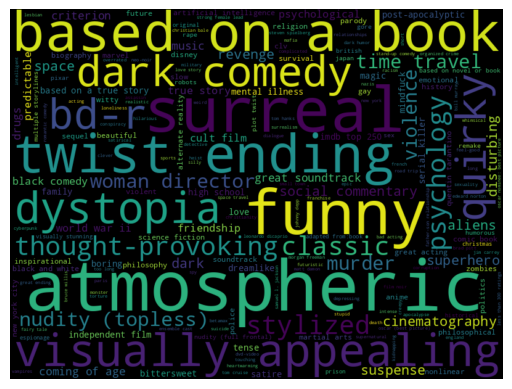

In [19]:
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.savefig('WordCloud.pdf', format='pdf', bbox_inches='tight')
plt.show()

**Indexing Dataset by User (given movie and rating)**

In [24]:
user_data = [[] for _ in range(len(users))]

for (user_id, movie_id, rating) in zip(userid, movieid, ratings):
    useridx = user_to_idx[user_id]
    user_data[useridx].append((movie_to_idx[movie_id], rating))

**Indexing Dataset by Movie (given user and rating)**

In [25]:
movie_data = [[] for _ in range(len(movies))]

for (user_id, movie_id, rating) in zip(userid, movieid, ratings):
    movieidx = movie_to_idx[movie_id]
    movie_data[movieidx].append((user_to_idx[user_id], rating))

**Rating Distribution by User**

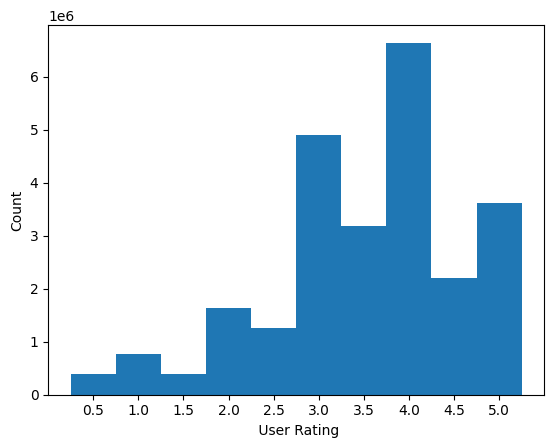

In [26]:
user_group = ratingsdf['rating'].value_counts()
plt.bar(user_group.index, height=user_group, width=0.5, align='center')
plt.xlabel(' User Rating')
plt.ylabel('Count')
plt.xticks(user_group.index)
# plt.title('User Rating Distribution')
plt.savefig("User Rating Distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

**POWER LAWS**

**Movie and User by Rating**

In [27]:
user, counts = np.unique(ratingsdf.userId.values, return_counts=True)
user_ratings, user_rate = np.unique(counts, return_counts=True)

In [28]:
movie, countss = np.unique(ratingsdf.movieId.values, return_counts=True)
movie_ratings, movie_rate = np.unique(countss, return_counts=True)

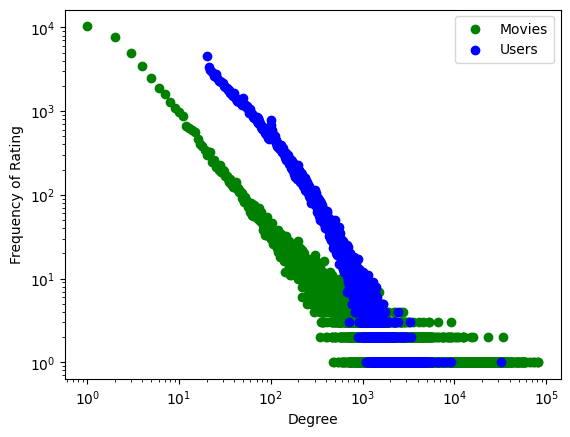

In [29]:
plt.scatter(movie_ratings, movie_rate, c='green', label='Movies')
plt.scatter(user_ratings, user_rate, c='blue', label='Users')
plt.xscale('log')
plt.yscale('log')
# plt.title('Popularity of Movie given Ratings')
plt.xlabel('Degree')
plt.ylabel('Frequency of Rating')
plt.legend()
plt.savefig("Popularity of Movie given Ratings.pdf", format="pdf", bbox_inches="tight")
plt.show()

**100K Dataset Exploration and Data Structures**

In [31]:
dir = "/home/catherine/Downloads/AMLS"
s1 = os.path.join(dir, "ml-latest-small", "ratings.csv")
s2 = os.path.join(dir, "ml-latest-small", "movies.csv")
s3 =  os.path.join(dir, "ml-latest-small", "tags.csv")
ratings100 = pd.read_csv(s1)
movies100 = pd.read_csv(s2)
tags100 = pd.read_csv(s3)

In [32]:
rating_count100 = ratings100.shape[0]
print(f'Number of Ratings: {rating_count100}')
user_count100 = ratings100['userId'].nunique()
print(f'Number of unique users: {user_count100}')
movie_count100 = ratings100['movieId'].nunique()
print(f'Number of unique movies: {movie_count100}')

userating100 = ratings100.groupby('userId')['rating'].count()
print(f'Maximum movies rated by a user: {userating100.max()}')
print(f'Minimum movies rated by a user: {userating100.min()}')
print(f'Average movies rated by a user: {userating100.mean():.2f}')

movierating100 = ratings100.groupby('movieId')['rating'].count()
print(f'Maximum times users rated a movie: {movierating100.max()}')
print(f'Minimum times users rated a movie: {movierating100.min()}')
print(f'Average times users rated a movie: {movierating100.mean():.2f}')

Number of Ratings: 100836
Number of unique users: 610
Number of unique movies: 9724
Maximum movies rated by a user: 2698
Minimum movies rated by a user: 20
Average movies rated by a user: 165.30
Maximum times users rated a movie: 329
Minimum times users rated a movie: 1
Average times users rated a movie: 10.37


In [33]:
ratingss = ratings100['rating'].tolist()
userid100 = ratings100['userId'].tolist()
movieid100 = ratings100['movieId'].tolist()

In [34]:
users100 = sorted(set(userid100))
movies100 = sorted(set(movieid100))

In [35]:
idx_to_movies100 = [movies100[i] for i in range(len(movies100))]
idx_to_user100 = [users100[i] for i in range(len(users100))]

In [36]:
user_to_idx100 = {user_id100: index for index, user_id100 in enumerate(users100)}

movie_to_idx100 = {movie_id100: index for index, movie_id100 in enumerate(movies100)}

**Index by User (given movie and rating)  and by Movie (given user and rating) 100k**

In [37]:
user_data100 = [[] for _ in range(len(users100))]
movie_data100 = [[] for _ in range(len(movies100))]

for (user_id100, movie_id100, rating) in zip(userid100, movieid100, ratingss):
    useridx100 = user_to_idx100[user_id100]
    movieidx100 = movie_to_idx100[movie_id100]
    user_data100[useridx100].append((movie_to_idx100[movie_id100], rating))
    movie_data100[movieidx100].append((user_to_idx100[user_id100], rating))

**User + Item Biases with Alternating Least Squares**

In [ ]:
lam = 0.05
gamm = 0.0001
epochs = 100

M = len(user_data100)
N = len(movie_data100)

user_biases = np.zeros((M))
item_biases = np.zeros((N))
losses = []
rmse = []

for i in range(epochs):

  for m in range(M):
    bias = 0
    item_counter =0
    for (n, r) in user_data100[m]:
      bias += lam * (r - item_biases[n])
      item_counter += 1
    bias = bias / (lam * item_counter + gamm)
    user_biases[m] = bias

  for n in range(N):
    bias = 0
    user_counter = 0
    for (m, r) in movie_data100[n]:
      bias += lam * (r - user_biases[m])
      user_counter += 1
    bias = bias / (lam * user_counter + gamm)
    item_biases[n] = bias

  loss = 0
  for m in range(M):
    for (n, r) in user_data100[m]:
      loss += (r - (user_biases[m] + item_biases[n]))** 2
  loss = (-(lam/2) * loss) - ((gamm/2 * np.sum(user_biases**2)) + (gamm/2 * np.sum(item_biases**2)))
  losses.append(loss)

  setrmse = 0
  for m in range(M):
    for (n, r) in user_data100[m]:
      setrmse += (1/len(ratings100)) * ((user_biases[m] + item_biases[n]) - r)**2
  setrmse = np.sqrt(setrmse)
  rmse.append(setrmse)

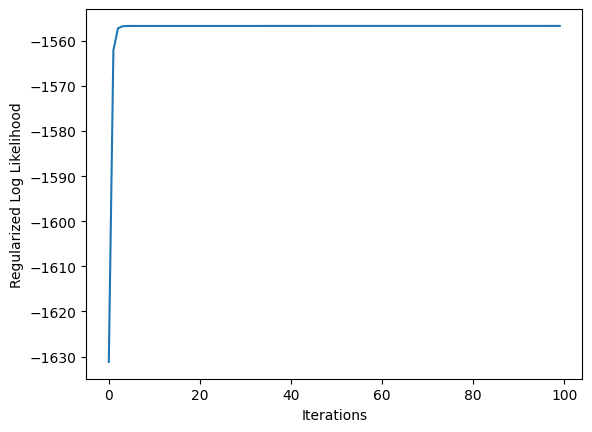

In [ ]:
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Regularized Log Likelihood')
plt.savefig("Bias Only-Loss 100k.pdf", format="pdf", bbox_inches="tight")
plt.show()

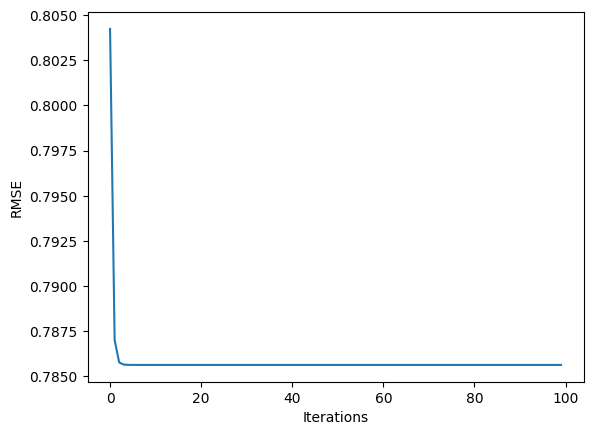

In [ ]:
plt.plot(rmse)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.savefig("Bias only-RMSE 100k.pdf", format="pdf", bbox_inches="tight")
plt.show()

**User and Item Factors (latent trait vectors or matrices U and V)**

In [ ]:
lam = 0.05
gamm = 0.001
tau = 0.001
epochs = 100

K = 10

user_biases = np.zeros((M))
item_biases = np.zeros((N))
user_factor = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (K,N))
losses_latent = []
rmse_latent = []

for i in range(epochs):

#updating user bias
  for m in range(M):
    bias = 0
    item_counter =0
    for (n, r) in user_data100[m]:
      bias += lam * (r - user_factor[m,:].T .dot(item_factor[:,n]) - item_biases[n])
      item_counter += 1
    bias = bias / (lam * item_counter + gamm)
    user_biases[m] = bias

#updating user factor
    user_factorm = 0
    user_factormm = 0
    for (n,r) in user_data100[m]:
      user_factorm +=  item_factor[:,n]*item_factor[:,n].reshape(-1,1)
      user_factormm +=  item_factor[:,n] * (r - user_biases[m] - item_biases[n])
    user_factor[m,:] = np.linalg.solve(lam * user_factorm + tau * np.identity(K), lam * user_factormm)

#updating item bias
  for n in range(N):
    bias = 0
    user_counter = 0
    for (m, r) in movie_data100[n]:
      bias += lam * (r - user_factor[m,:].T.dot( item_factor[:,n]) - user_biases[m])
      user_counter += 1
    bias = bias / (lam * user_counter + gamm)
    item_biases[n] = bias

#updating item factor
    item_factorm = 0
    item_factormm = 0
    for (m,r) in movie_data100[n]:
      item_factorm += user_factor[m,:]*user_factor[m,:].reshape(-1,1)
      item_factormm += user_factor[m,:] * (r - user_biases[m] - item_biases[n])
    item_factor[:,n] = np.linalg.solve(lam * item_factorm + tau * np.identity(K), lam * item_factormm)

#calculating losses
  residue = 0
  for m in range(M):
    for (n, r) in user_data100[m]:
      residue += (r - user_factor[m,:].T.dot(item_factor[:,n]) - (user_biases[m] + item_biases[n]))** 2
  loss = (-(lam/2) * residue) - ((gamm/2 * np.sum(user_biases**2)) + (gamm/2 * np.sum(item_biases**2)))
  loss = loss - 0.5 * tau * (np.einsum('ji,ij->',user_factor.T,user_factor) + np.einsum('ji,ij->',item_factor.T,item_factor))
  losses_latent.append(loss)

#calculating rmse
  setrmse = (1/len(ratings100)) * residue
  setrmse = np.sqrt(setrmse)
  rmse_latent.append(setrmse)

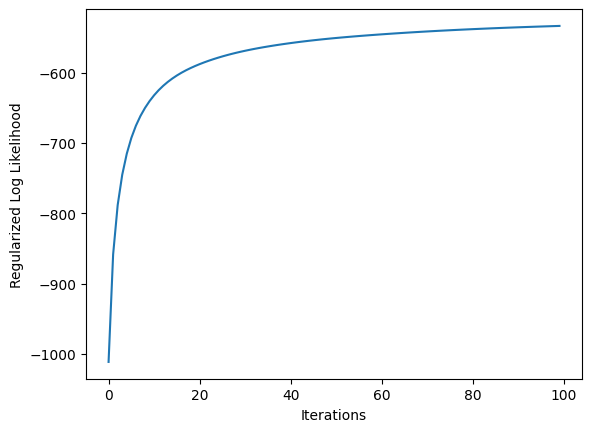

In [ ]:
plt.plot(losses_latent)
plt.xlabel('Iterations')
plt.ylabel('Regularized Log Likelihood')
plt.savefig("Bias & Latent-loss 100k.pdf", format="pdf", bbox_inches="tight")
plt.show()

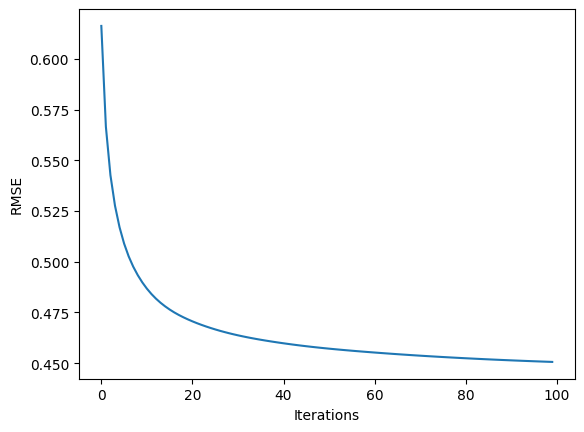

In [ ]:
plt.plot(rmse_latent)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.savefig("Bias & Latent-RMSE 100k.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Split the 25M dataset into a training and a test set**

In [41]:
key = np.random.default_rng(42)

In [31]:
ratings = ratingsdf['rating'].tolist()
userid = ratingsdf['userId'].tolist()
movieid = ratingsdf['movieId'].tolist()

In [32]:
users = sorted(set(userid))
movies = sorted(set(movieid))

idx_to_movies = [movies[i] for i in range(len(movies))]
idx_to_user = [users[i] for i in range(len(users))]

user_to_idx = {user_id: index for index, user_id in enumerate(users)}
movie_to_idx = {movie_id: index for index, movie_id in enumerate(movies)}

In [ ]:
train_user_data = [[] for _ in range(len(users))]
test_user_data = [[] for _ in range(len(users))]

train_movie_data = [[] for _ in range(len(movies))]
test_movie_data = [[] for _ in range(len(movies))]

for (user_id, movie_id, rating) in zip(userid, movieid, ratings):
  useridx = user_to_idx[user_id]
  movieidx = movie_to_idx[movie_id]
  if key.uniform(0,1) < 0.7:
    train_user_data[useridx].append((movieidx, rating))
    train_movie_data[movieidx].append((useridx, rating))
  else:
    test_user_data[useridx].append((movieidx, rating))
    test_movie_data[movieidx].append((useridx, rating))

In [45]:
train_user_data = [np.array(q) for q in train_user_data]
test_user_data = [np.array(q) for q in test_user_data]
train_movie_data = [np.array(q) for q in train_movie_data]
test_movie_data = [np.array(q) for q in test_movie_data]

**User and Item Factors (latent trait vectors or matrices U and V) after train-test split**

In [ ]:
# lam = 5
# gamm = 0.1
# tau = 1
# epochs = 100

# K = 2

# M = len(train_user_data)
# N = len(test_movie_data)

# user_biases_train = np.zeros((M))
# item_biases_train = np.zeros((N))
# user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
# item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (K,N))

# losses_latent_train = []
# losses_latent_test = []
# rmse_latent_train = []
# rmse_latent_test = []

# for i in range(epochs):

# #updating user bias
#   for m in range(M):
#     bias = 0
#     item_counter = 0
#     if train_user_data[m]:
#       for (n, r) in train_user_data[m]:
#         bias += lam * (r - user_factor_train[m,:].T.dot(item_factor_train[:,n]) - item_biases_train[n])
#         item_counter += 1
#       bias = bias / (lam * item_counter + gamm)
#       user_biases_train[m] = bias

#   #updating user factor
#       user_factorm_train = 0
#       user_factormm_train = 0
#       for (n,r) in train_user_data[m]:
#         user_factorm_train +=  item_factor_train[:,n]*item_factor_train[:,n].reshape(-1,1)
#         user_factormm_train +=  item_factor_train[:,n] * (r - user_biases_train[m] - item_biases_train[n])
#       user_factor_train[m,:] = np.linalg.solve(lam * user_factorm_train + tau * np.identity(K), lam * user_factormm_train)

# #updating item bias
#   for n in range(N):
#     bias = 0
#     user_counter = 0
#     if train_movie_data[n]:
#       for (m, r) in train_movie_data[n]:
#         bias += lam * (r - user_factor_train[m,:].T.dot( item_factor_train[:,n]) - user_biases_train[m])
#         user_counter += 1
#       bias = bias / (lam * user_counter + gamm)
#       item_biases_train[n] = bias

#   #updating item factor
#       item_factorm_train = 0
#       item_factormm_train = 0
#       for (m,r) in train_movie_data[n]:
#         item_factorm_train += user_factor_train[m,:]*user_factor_train[m,:].reshape(-1,1)
#         item_factormm_train += user_factor_train[m,:] * (r - user_biases_train[m] - item_biases_train[n])
#       item_factor_train[:,n] = np.linalg.solve(lam * item_factorm_train + tau * np.identity(K), lam * item_factormm_train)

# #calculating losses for train
#   residue = 0
#   train_size = 0
#   for m in range(M):
#     for (n, r) in train_user_data[m]:
#       residue += (r - user_factor_train[m,:].T.dot(item_factor_train[:,n]) - (user_biases_train[m] + item_biases_train[n]))** 2
#       train_size += 1
#   loss = (-(lam/2) * residue) - ((gamm/2 * np.sum(user_biases_train**2)) + (gamm/2 * np.sum(item_biases_train**2)))
#   loss = loss - 0.5 * tau * (np.einsum('ji,ij->',user_factor_train.T,user_factor_train) + np.einsum('ji,ij->',item_factor_train.T,item_factor_train))
#   losses_latent_train.append(loss)

# # calculating losses for test
#   residue_test = 0
#   test_size = 0
#   for m in range(M):
#     for (n, r) in test_user_data[m]:
#       residue_test += (r - user_factor_train[m,:].T.dot(item_factor_train[:,n]) - (user_biases_train[m] + item_biases_train[n]))** 2
#       test_size += 1
#   loss_test = (-(lam/2) * residue_test) - ((gamm/2 * np.sum(user_biases_train**2)) + (gamm/2 * np.sum(item_biases_train**2)))
#   loss_test = loss_test - 0.5 * tau * (np.einsum('ji,ij->',user_factor_train.T,user_factor_train) + np.einsum('ji,ij->',item_factor_train.T,item_factor_train))
#   losses_latent_test.append(loss_test)

# #calculating rmse for train
#   setrmse = (1/train_size) * residue
#   setrmse = np.sqrt(setrmse)
#   rmse_latent_train.append(setrmse)

# #calculating rmse for test
#   setrmse_test = (1/test_size) * residue_test
#   setrmse_test = np.sqrt(setrmse_test)
#   rmse_latent_test.append(setrmse_test)

#   print(f'iteration {i} train rmse {setrmse} test rmse {setrmse_test}')

iteration 0 train rmse 0.859594137819997 test rmse 0.878979881218217
iteration 1 train rmse 0.8211519523193785 test rmse 0.8441238023660631
iteration 2 train rmse 0.805188455419141 test rmse 0.8299188884466103
iteration 3 train rmse 0.7994970425985171 test rmse 0.8248837410235943
iteration 4 train rmse 0.797126016029795 test rmse 0.8227796374797384
iteration 5 train rmse 0.7959366833398801 test rmse 0.8216873645905697
iteration 6 train rmse 0.795227013785292 test rmse 0.8210099123394022
iteration 7 train rmse 0.7947222225819601 test rmse 0.8205055768494249
iteration 8 train rmse 0.7943085490225742 test rmse 0.8200716944007473
iteration 9 train rmse 0.7939325355367665 test rmse 0.8196573707249003
iteration 10 train rmse 0.7935657318515991 test rmse 0.8192403286072188
iteration 11 train rmse 0.7931913977381015 test rmse 0.8188121769336819
iteration 12 train rmse 0.7927996000617302 test rmse 0.8183674073424275
iteration 13 train rmse 0.7923871447137489 test rmse 0.8179136605923594
iterati

In [ ]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 20

M = len(train_user_data)
N = len(train_movie_data)

user_biases_train = np.zeros((M))
item_biases_train = np.zeros((N))
user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))

losses_latent_train = []
losses_latent_test = []
rmse_latent_train = []
rmse_latent_test = []


for i in tqdm(range(epochs)):
    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[indices]) - item_biases_train[indices]) / (lam * len(indices) + gamm)
            user_biases_train[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_train[indices], item_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_train[indices], ratings - user_bias_train - item_biases_train[indices]), axis=0)

            # Update user factor
            user_factor_train[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)

            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_train[indices], item_factor_train[n]) - user_biases_train[indices]) / (lam * len(indices) + gamm)
            item_biases_train[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_train[indices], user_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_train[indices], ratings - user_biases_train[indices] - item_bias_train), axis=0)

            # Update item factor
            item_factor_train[n] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[train_indices]) - user_biases_train[m] - item_biases_train[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[test_indices]) - user_biases_train[m] - item_biases_train[test_indices])**2)
            test_size += len(test_indices)

    train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_train, item_factor_train) + np.einsum('ij,ij->', user_factor_train, user_factor_train))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    losses_latent_train.append(train_loss)
    rmse_latent_train.append(train_rmse)

    test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_train, item_factor_train) + np.einsum('ij, ij->', user_factor_train, user_factor_train))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    losses_latent_test.append(test_loss)
    rmse_latent_test.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

  1%|▍                                          | 1/100 [00:31<52:04, 31.56s/it]

train rmse 0.7761547448157005 test rmse 0.9665756815774773


  2%|▊                                          | 2/100 [01:02<50:34, 30.97s/it]

train rmse 0.7201898866513424 test rmse 0.9319115966993221


  3%|█▎                                         | 3/100 [01:32<49:39, 30.72s/it]

train rmse 0.6891791387623928 test rmse 0.9054668432805772


  4%|█▋                                         | 4/100 [02:02<48:57, 30.60s/it]

train rmse 0.6707608882034958 test rmse 0.8891798142769086


  5%|██▏                                        | 5/100 [02:33<48:23, 30.57s/it]

train rmse 0.6594818163671895 test rmse 0.87961088948691


  6%|██▌                                        | 6/100 [03:03<47:51, 30.55s/it]

train rmse 0.6521657511158963 test rmse 0.8738277226859927


  7%|███                                        | 7/100 [03:34<47:17, 30.51s/it]

train rmse 0.6470971995732253 test rmse 0.8701630628703643


  8%|███▍                                       | 8/100 [04:04<46:46, 30.50s/it]

train rmse 0.6433840135715119 test rmse 0.8677557038224877


  9%|███▊                                       | 9/100 [04:35<46:15, 30.50s/it]

train rmse 0.6405392624864669 test rmse 0.8661272294280515


 10%|████▏                                     | 10/100 [05:07<46:33, 31.04s/it]

train rmse 0.6382800437518404 test rmse 0.8649740570410063


 11%|████▌                                     | 11/100 [05:40<46:54, 31.63s/it]

train rmse 0.6364326473135974 test rmse 0.8641191020321449


 12%|█████                                     | 12/100 [06:12<46:31, 31.72s/it]

train rmse 0.6348879870499627 test rmse 0.8634716395830452


 13%|█████▍                                    | 13/100 [06:44<46:08, 31.83s/it]

train rmse 0.6335753357388938 test rmse 0.8629887533489652


 14%|█████▉                                    | 14/100 [07:16<45:43, 31.90s/it]

train rmse 0.6324469552186827 test rmse 0.8626490457380762


 15%|██████▎                                   | 15/100 [07:48<45:14, 31.94s/it]

train rmse 0.6314689408533187 test rmse 0.8624376596563615


 16%|██████▋                                   | 16/100 [08:20<44:43, 31.95s/it]

train rmse 0.6306158775368991 test rmse 0.8623417141084303


 17%|███████▏                                  | 17/100 [08:52<44:12, 31.95s/it]

train rmse 0.6298678707828818 test rmse 0.8623469383377421


 18%|███████▌                                  | 18/100 [09:24<43:38, 31.94s/it]

train rmse 0.6292089761645674 test rmse 0.8624378822963268


 19%|███████▉                                  | 19/100 [09:56<43:04, 31.91s/it]

train rmse 0.628626316543415 test rmse 0.8625989490312603


 20%|████████▍                                 | 20/100 [10:28<42:32, 31.91s/it]

train rmse 0.6281093697695945 test rmse 0.8628162358511806


 21%|████████▊                                 | 21/100 [11:00<42:05, 31.97s/it]

train rmse 0.6276494562537485 test rmse 0.8630773530388032


 22%|█████████▏                                | 22/100 [11:32<41:32, 31.96s/it]

train rmse 0.6272391042852519 test rmse 0.8633714489700991


 23%|█████████▋                                | 23/100 [12:04<40:59, 31.94s/it]

train rmse 0.6268717440722332 test rmse 0.8636901856331016


 24%|██████████                                | 24/100 [12:36<40:26, 31.92s/it]

train rmse 0.6265415862879579 test rmse 0.8640270596692453


 25%|██████████▌                               | 25/100 [13:08<39:56, 31.95s/it]

train rmse 0.626243614352345 test rmse 0.8643770245055572


 26%|██████████▉                               | 26/100 [13:39<39:21, 31.92s/it]

train rmse 0.6259735841017153 test rmse 0.8647359015145022


 27%|███████████▎                              | 27/100 [14:11<38:50, 31.92s/it]

train rmse 0.6257280008067031 test rmse 0.8651000437707124


 28%|███████████▊                              | 28/100 [14:43<38:19, 31.94s/it]

train rmse 0.6255038528693393 test rmse 0.8654666207985449


 29%|████████████▏                             | 29/100 [15:16<37:52, 32.00s/it]

train rmse 0.625298521646492 test rmse 0.8658339580655448


 30%|████████████▌                             | 30/100 [15:48<37:20, 32.01s/it]

train rmse 0.6251097705202614 test rmse 0.8662011700462882


 31%|█████████████                             | 31/100 [16:20<36:49, 32.02s/it]

train rmse 0.6249356960031709 test rmse 0.8665677032212156


 32%|█████████████▍                            | 32/100 [16:52<36:20, 32.07s/it]

train rmse 0.624774679112025 test rmse 0.8669333385405051


 33%|█████████████▊                            | 33/100 [17:24<35:47, 32.05s/it]

train rmse 0.6246253344840598 test rmse 0.8672981349205834


 34%|██████████████▎                           | 34/100 [17:56<35:14, 32.04s/it]

train rmse 0.6244864706450818 test rmse 0.8676623962907017


 35%|██████████████▋                           | 35/100 [18:28<34:42, 32.03s/it]

train rmse 0.6243570650060826 test rmse 0.8680262793721805


 36%|███████████████                           | 36/100 [19:00<34:11, 32.05s/it]

train rmse 0.6242362413269832 test rmse 0.8683893827444017


 37%|███████████████▌                          | 37/100 [19:32<33:38, 32.04s/it]

train rmse 0.6241232496790071 test rmse 0.8687507467536917


 38%|███████████████▉                          | 38/100 [20:04<33:05, 32.03s/it]

train rmse 0.6240174399842616 test rmse 0.8691091720475675


 39%|████████████████▍                         | 39/100 [20:36<32:33, 32.02s/it]

train rmse 0.6239182279977794 test rmse 0.8694636960177596


 40%|████████████████▊                         | 40/100 [21:08<32:00, 32.01s/it]

train rmse 0.62382507397444 test rmse 0.8698137474667786


 41%|█████████████████▏                        | 41/100 [21:40<31:26, 31.98s/it]

train rmse 0.6237374773461939 test rmse 0.8701589622195082


 42%|█████████████████▋                        | 42/100 [22:12<30:53, 31.96s/it]

train rmse 0.623654976925174 test rmse 0.8704990688109758


 43%|██████████████████                        | 43/100 [22:44<30:22, 31.98s/it]

train rmse 0.6235771530820474 test rmse 0.8708338606008066


 44%|██████████████████▍                       | 44/100 [23:16<29:53, 32.03s/it]

train rmse 0.6235036244929529 test rmse 0.871163108933119


 45%|██████████████████▉                       | 45/100 [23:48<29:23, 32.07s/it]

train rmse 0.6234340751445688 test rmse 0.871486401034722


 46%|███████████████████▎                      | 46/100 [24:20<28:49, 32.03s/it]

train rmse 0.6233682410203747 test rmse 0.8718032191887153


 47%|███████████████████▋                      | 47/100 [24:52<28:17, 32.02s/it]

train rmse 0.6233058498388211 test rmse 0.8721132538143254


 48%|████████████████████▏                     | 48/100 [25:24<27:47, 32.06s/it]

train rmse 0.6232466569464056 test rmse 0.8724162547312743


 49%|████████████████████▌                     | 49/100 [25:54<26:41, 31.39s/it]

train rmse 0.6231904418689318 test rmse 0.8727120887970079


 50%|█████████████████████                     | 50/100 [26:24<25:46, 30.92s/it]

train rmse 0.6231370076821492 test rmse 0.8730007664484495


 51%|█████████████████████▍                    | 51/100 [26:54<25:00, 30.62s/it]

train rmse 0.623086181935409 test rmse 0.8732823675430026


 52%|█████████████████████▊                    | 52/100 [27:24<24:21, 30.45s/it]

train rmse 0.6230378084031688 test rmse 0.8735568858657248


 53%|██████████████████████▎                   | 53/100 [27:54<23:42, 30.27s/it]

train rmse 0.6229917343924114 test rmse 0.8738243097234624


 54%|██████████████████████▋                   | 54/100 [28:23<23:06, 30.14s/it]

train rmse 0.6229478091426279 test rmse 0.874084797877237


 55%|███████████████████████                   | 55/100 [28:54<22:47, 30.39s/it]

train rmse 0.6229058896643188 test rmse 0.8743386663707075


 56%|███████████████████████▌                  | 56/100 [29:24<22:09, 30.23s/it]

train rmse 0.6228658423298195 test rmse 0.8745863132570477


 57%|███████████████████████▉                  | 57/100 [29:54<21:34, 30.11s/it]

train rmse 0.6228275419520876 test rmse 0.8748281890829243


 58%|████████████████████████▎                 | 58/100 [30:24<21:01, 30.03s/it]

train rmse 0.6227908747858741 test rmse 0.8750647608479106


 59%|████████████████████████▊                 | 59/100 [30:54<20:33, 30.08s/it]

train rmse 0.6227557406682644 test rmse 0.8752964334911846


 60%|█████████████████████████▏                | 60/100 [31:24<20:00, 30.01s/it]

train rmse 0.6227220463282719 test rmse 0.875523530742387


 61%|█████████████████████████▌                | 61/100 [31:54<19:28, 29.96s/it]

train rmse 0.6226896987075901 test rmse 0.8757463856441818


 62%|██████████████████████████                | 62/100 [32:24<18:56, 29.91s/it]

train rmse 0.6226586174673486 test rmse 0.8759651955461577


 63%|██████████████████████████▍               | 63/100 [32:54<18:26, 29.91s/it]

train rmse 0.6226287522276073 test rmse 0.8761798114234016


 64%|██████████████████████████▉               | 64/100 [33:23<17:56, 29.91s/it]

train rmse 0.6226000467711437 test rmse 0.8763902963416464


 65%|███████████████████████████▎              | 65/100 [33:53<17:26, 29.89s/it]

train rmse 0.6225724352655738 test rmse 0.8765968561945549


 66%|███████████████████████████▋              | 66/100 [34:23<16:56, 29.89s/it]

train rmse 0.6225458594534791 test rmse 0.8767996154909296


 67%|████████████████████████████▏             | 67/100 [34:53<16:28, 29.95s/it]

train rmse 0.6225202682180934 test rmse 0.8769986594322748


 68%|████████████████████████████▌             | 68/100 [35:23<15:59, 29.98s/it]

train rmse 0.62249561408317 test rmse 0.8771940400543184


 69%|████████████████████████████▉             | 69/100 [35:53<15:27, 29.93s/it]

train rmse 0.6224718505137202 test rmse 0.877385782257029


 70%|█████████████████████████████▍            | 70/100 [36:23<14:57, 29.91s/it]

train rmse 0.6224489320435659 test rmse 0.8775739018552721


 71%|█████████████████████████████▊            | 71/100 [36:53<14:25, 29.85s/it]

train rmse 0.622426815473376 test rmse 0.8777584183956059


 72%|██████████████████████████████▏           | 72/100 [37:23<13:55, 29.84s/it]

train rmse 0.6224054606086694 test rmse 0.8779393577376591


 73%|██████████████████████████████▋           | 73/100 [37:52<13:25, 29.83s/it]

train rmse 0.6223848303462304 test rmse 0.8781167494258366


 74%|███████████████████████████████           | 74/100 [38:23<12:59, 29.97s/it]

train rmse 0.6223648901985698 test rmse 0.8782906247264419


 75%|███████████████████████████████▌          | 75/100 [38:53<12:28, 29.96s/it]

train rmse 0.6223456075219674 test rmse 0.8784610186723366


 76%|███████████████████████████████▉          | 76/100 [39:22<11:57, 29.91s/it]

train rmse 0.6223269508892745 test rmse 0.8786279786347284


 77%|████████████████████████████████▎         | 77/100 [39:52<11:27, 29.87s/it]

train rmse 0.6223088899319439 test rmse 0.878791578379982


 78%|████████████████████████████████▊         | 78/100 [40:22<10:58, 29.94s/it]

train rmse 0.6222913955854523 test rmse 0.8789519264974527


 79%|█████████████████████████████████▏        | 79/100 [40:52<10:29, 29.99s/it]

train rmse 0.622274440375598 test rmse 0.8791091615633241


 80%|█████████████████████████████████▌        | 80/100 [41:22<09:58, 29.94s/it]

train rmse 0.622257998529997 test rmse 0.879263440602712


 81%|██████████████████████████████████        | 81/100 [41:52<09:28, 29.92s/it]

train rmse 0.622242046216351 test rmse 0.8794149205790835


 82%|██████████████████████████████████▍       | 82/100 [42:22<08:58, 29.89s/it]

train rmse 0.6222265624290457 test rmse 0.8795637260374374


 83%|██████████████████████████████████▊       | 83/100 [42:52<08:28, 29.91s/it]

train rmse 0.622211530148036 test rmse 0.8797099245539545


 84%|███████████████████████████████████▎      | 84/100 [43:22<07:57, 29.84s/it]

train rmse 0.622196935897414 test rmse 0.8798535192644915


 85%|███████████████████████████████████▋      | 85/100 [43:52<07:30, 30.04s/it]

train rmse 0.6221827671368378 test rmse 0.8799944624577466


 86%|████████████████████████████████████      | 86/100 [44:22<06:58, 29.92s/it]

train rmse 0.622169009843291 test rmse 0.8801327087313252


 87%|████████████████████████████████████▌     | 87/100 [44:51<06:28, 29.87s/it]

train rmse 0.6221556483298125 test rmse 0.8802682506782558


 88%|████████████████████████████████████▉     | 88/100 [45:21<05:57, 29.81s/it]

train rmse 0.6221426669024949 test rmse 0.8804011083213561


 89%|█████████████████████████████████████▍    | 89/100 [45:51<05:27, 29.76s/it]

train rmse 0.6221300518148648 test rmse 0.8805313055492938


 90%|█████████████████████████████████████▊    | 90/100 [46:20<04:57, 29.72s/it]

train rmse 0.6221177915626893 test rmse 0.8806588628525452


 91%|██████████████████████████████████████▏   | 91/100 [46:51<04:28, 29.87s/it]

train rmse 0.6221058752837786 test rmse 0.8807838070831476


 92%|██████████████████████████████████████▋   | 92/100 [47:21<03:59, 29.92s/it]

train rmse 0.6220942913056376 test rmse 0.8809061783525807


 93%|███████████████████████████████████████   | 93/100 [47:50<03:29, 29.91s/it]

train rmse 0.6220830270149121 test rmse 0.8810260258973696


 94%|███████████████████████████████████████▍  | 94/100 [48:20<02:59, 29.90s/it]

train rmse 0.622072069480879 test rmse 0.8811434013346656


 95%|███████████████████████████████████████▉  | 95/100 [48:50<02:29, 29.92s/it]

train rmse 0.6220614060772952 test rmse 0.8812583540627824


 96%|████████████████████████████████████████▎ | 96/100 [49:20<01:59, 29.93s/it]

train rmse 0.6220510247926543 test rmse 0.881370924498621


 97%|████████████████████████████████████████▋ | 97/100 [49:50<01:29, 29.89s/it]

train rmse 0.6220409140786775 test rmse 0.8814811368672593


 98%|█████████████████████████████████████████▏| 98/100 [50:20<00:59, 29.89s/it]

train rmse 0.6220310623643558 test rmse 0.8815890102806989


 99%|█████████████████████████████████████████▌| 99/100 [50:50<00:29, 29.86s/it]

train rmse 0.6220214579629707 test rmse 0.8816945909816125


100%|█████████████████████████████████████████| 100/100 [51:20<00:00, 30.80s/it]

train rmse 0.6220120903592188 test rmse 0.8817979496427889


In [3]:
with open('loss_testk20.pkl', 'rb') as f:
  losses_latent_testk20 = pickle.load(f)

with open('loss_traink20.pkl', 'rb') as f:
  losses_latent_traink20 = pickle.load(f)

with open('rmse_testk20.pkl', 'rb') as f:
  rmse_latent_testk20 = pickle.load(f)

with open('rmse_traink20.pkl', 'rb') as f:
  rmse_latent_traink20 = pickle.load(f)

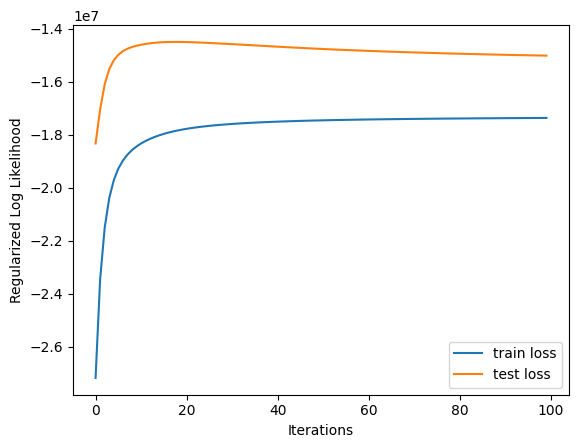

In [5]:
plt.plot(losses_latent_traink20, label='train loss')
plt.plot(losses_latent_testk20, label='test loss')
plt.xlabel('Iterations')
plt.ylabel('Regularized Log Likelihood')
plt.legend()
# plt.savefig("Bias & Latent-loss_splitdata(25m)k20.pdf", format="pdf", bbox_inches="tight")
plt.show()

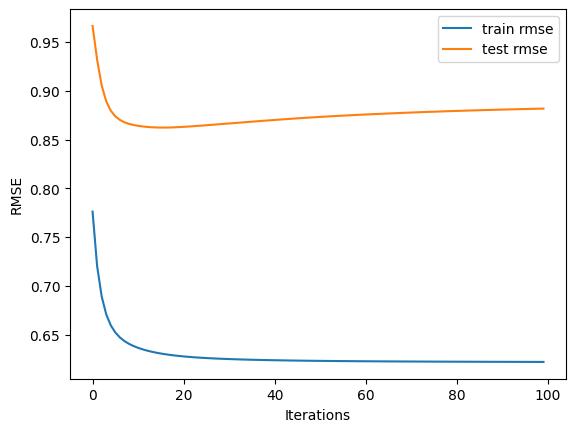

In [6]:
plt.plot(rmse_latent_traink20, label='train rmse')
plt.plot(rmse_latent_testk20, label='test rmse')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
# plt.savefig("Bias & Latent-rmse_splitdata(25m)k20.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 10

M = len(train_user_data)
N = len(train_movie_data)

user_biases_train = np.zeros((M))
item_biases_train = np.zeros((N))
user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))

losses_latent_train = []
losses_latent_test = []
rmse_latent_train = []
rmse_latent_test = []


for i in tqdm(range(epochs)):
    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[indices]) - item_biases_train[indices]) / (lam * len(indices) + gamm)
            user_biases_train[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_train[indices], item_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_train[indices], ratings - user_bias_train - item_biases_train[indices]), axis=0)

            # Update user factor
            user_factor_train[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)

            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_train[indices], item_factor_train[n]) - user_biases_train[indices]) / (lam * len(indices) + gamm)
            item_biases_train[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_train[indices], user_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_train[indices], ratings - user_biases_train[indices] - item_bias_train), axis=0)

            # Update item factor
            item_factor_train[n] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[train_indices]) - user_biases_train[m] - item_biases_train[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[test_indices]) - user_biases_train[m] - item_biases_train[test_indices])**2)
            test_size += len(test_indices)

    train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_train, item_factor_train) + np.einsum('ij,ij->', user_factor_train, user_factor_train))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    losses_latent_train.append(train_loss)
    rmse_latent_train.append(train_rmse)

    test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_train, item_factor_train) + np.einsum('ij, ij->', user_factor_train, user_factor_train))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    losses_latent_test.append(test_loss)
    rmse_latent_test.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

In [7]:
with open('loss_testk10.pkl', 'rb') as f:
  losses_latent_testk10 = pickle.load(f)

with open('loss_traink10.pkl', 'rb') as f:
  losses_latent_traink10 = pickle.load(f)

with open('rmse_testk10.pkl', 'rb') as f:
  rmse_latent_testk10 = pickle.load(f)

with open('rmse_traink10.pkl', 'rb') as f:
  rmse_latent_traink10 = pickle.load(f)

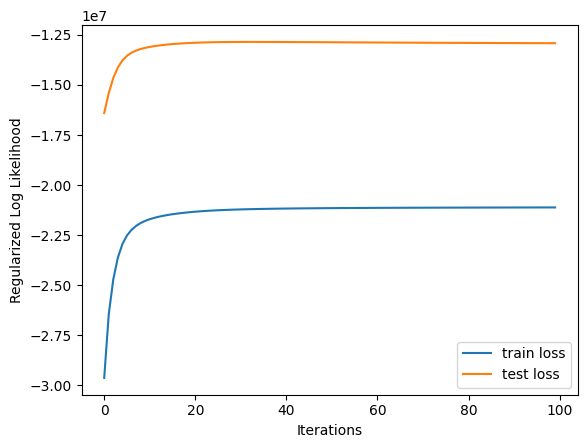

In [8]:
plt.plot(losses_latent_traink10, label='train loss')
plt.plot(losses_latent_testk10, label='test loss')
plt.xlabel('Iterations')
plt.ylabel('Regularized Log Likelihood')
plt.legend()
# plt.savefig("Bias & Latent-loss_splitdata(25m)k10.pdf", format="pdf", bbox_inches="tight")
plt.show()

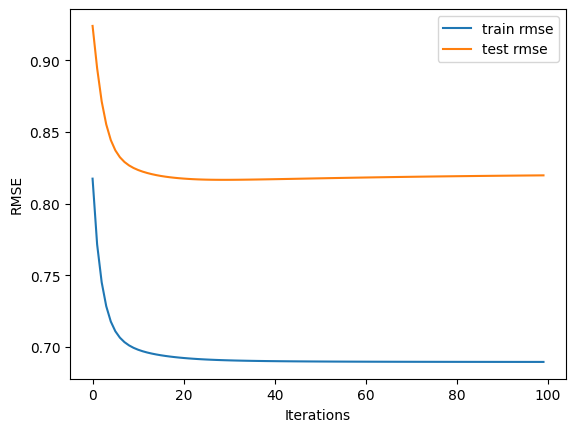

In [9]:
plt.plot(rmse_latent_traink10, label='train rmse')
plt.plot(rmse_latent_testk10, label='test rmse')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
# plt.savefig("Bias & Latent-rmse_splitdata(25m)k10.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 2

M = len(train_user_data)
N = len(train_movie_data)

user_biases_traink2 = np.zeros((M))
item_biases_traink2 = np.zeros((N))
user_factor_traink2 = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_traink2 = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))

losses_latent_traink2 = []
losses_latent_testk2 = []
rmse_latent_traink2 = []
rmse_latent_testk2 = []


for i in tqdm(range(epochs)):
    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_traink2[m], item_factor_traink2[indices]) - item_biases_traink2[indices]) / (lam * len(indices) + gamm)
            user_biases_traink2[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_traink2[indices], item_factor_traink2[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_traink2[indices], ratings - user_bias_train - item_biases_traink2[indices]), axis=0)

            # Update user factor
            user_factor_traink2[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)

            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_traink2[indices], item_factor_traink2[n]) - user_biases_traink2[indices]) / (lam * len(indices) + gamm)
            item_biases_traink2[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_traink2[indices], user_factor_traink2[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_traink2[indices], ratings - user_biases_traink2[indices] - item_bias_train), axis=0)

            # Update item factor
            item_factor_traink2[n] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_traink2[m], item_factor_traink2[train_indices]) - user_biases_traink2[m] - item_biases_traink2[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_traink2[m], item_factor_traink2[test_indices]) - user_biases_traink2[m] - item_biases_traink2[test_indices])**2)
            test_size += len(test_indices)

    train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_traink2**2) - 0.5 * gamm * np.sum(item_biases_traink2**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_traink2, item_factor_traink2) + np.einsum('ij,ij->', user_factor_traink2, user_factor_traink2))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    losses_latent_traink2.append(train_loss)
    rmse_latent_traink2.append(train_rmse)

    test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_traink2**2) - 0.5 * gamm * np.sum(item_biases_traink2**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_traink2, item_factor_traink2) + np.einsum('ij, ij->', user_factor_traink2, user_factor_traink2))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    losses_latent_testk2.append(test_loss)
    rmse_latent_testk2.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

  1%|▍                                          | 1/100 [00:20<33:28, 20.29s/it]

train rmse 0.8581985947042043 test rmse 0.8880011928655044


  2%|▊                                          | 2/100 [00:40<33:23, 20.44s/it]

train rmse 0.8338050681445862 test rmse 0.8689409207219445


  3%|█▎                                         | 3/100 [01:01<33:14, 20.56s/it]

train rmse 0.8202863755225175 test rmse 0.855729413565644


  4%|█▋                                         | 4/100 [01:24<34:22, 21.49s/it]

train rmse 0.804637946784397 test rmse 0.8392202575019938


  5%|██▏                                        | 5/100 [01:47<34:44, 21.95s/it]

train rmse 0.7954951845479605 test rmse 0.8297071105352277


  6%|██▌                                        | 6/100 [02:08<34:06, 21.77s/it]

train rmse 0.7913763792217365 test rmse 0.8254473743602522


  7%|███                                        | 7/100 [02:29<33:10, 21.40s/it]

train rmse 0.7894839543045163 test rmse 0.8235283699669197


  8%|███▍                                       | 8/100 [02:49<32:26, 21.16s/it]

train rmse 0.7885236906786854 test rmse 0.8225866076660898


  9%|███▊                                       | 9/100 [03:10<31:46, 20.95s/it]

train rmse 0.7879882440086025 test rmse 0.8220785733168553


 10%|████▏                                     | 10/100 [03:31<31:26, 20.97s/it]

train rmse 0.7876623967936661 test rmse 0.8217802926074137


 11%|████▌                                     | 11/100 [03:52<31:02, 20.93s/it]

train rmse 0.7874477595837179 test rmse 0.8215930557308101


 12%|█████                                     | 12/100 [04:13<30:39, 20.90s/it]

train rmse 0.7872970840378101 test rmse 0.821468494173753


 13%|█████▍                                    | 13/100 [04:33<30:06, 20.77s/it]

train rmse 0.7871860552221671 test rmse 0.8213800613944644


 14%|█████▉                                    | 14/100 [04:53<29:33, 20.62s/it]

train rmse 0.7871004294966756 test rmse 0.8213137475662363


 15%|██████▎                                   | 15/100 [05:14<29:04, 20.52s/it]

train rmse 0.7870309842463695 test rmse 0.8212619244646255


 16%|██████▋                                   | 16/100 [05:34<28:37, 20.45s/it]

train rmse 0.7869712014478495 test rmse 0.8212206960243755


 17%|███████▏                                  | 17/100 [05:54<28:19, 20.47s/it]

train rmse 0.7869167694904998 test rmse 0.8211886768820754


 18%|███████▌                                  | 18/100 [06:15<27:52, 20.40s/it]

train rmse 0.7868676431797001 test rmse 0.8211653458658531


 19%|███████▉                                  | 19/100 [06:35<27:23, 20.29s/it]

train rmse 0.7868255989918516 test rmse 0.821148780777058


 20%|████████▍                                 | 20/100 [06:55<26:58, 20.23s/it]

train rmse 0.7867898473691748 test rmse 0.8211361386220094


 21%|████████▊                                 | 21/100 [07:15<26:37, 20.22s/it]

train rmse 0.7867585976312002 test rmse 0.8211253073097725


 22%|█████████▏                                | 22/100 [07:35<26:19, 20.25s/it]

train rmse 0.7867298393136187 test rmse 0.8211145622492914


 23%|█████████▋                                | 23/100 [07:56<26:04, 20.32s/it]

train rmse 0.7867041687799375 test rmse 0.8211036258563382


 24%|██████████                                | 24/100 [08:16<25:38, 20.24s/it]

train rmse 0.7866818401180256 test rmse 0.8210950868100395


 25%|██████████▌                               | 25/100 [08:37<25:27, 20.37s/it]

train rmse 0.7866623679085647 test rmse 0.82108858949478


 26%|██████████▉                               | 26/100 [08:57<25:13, 20.45s/it]

train rmse 0.7866451559130894 test rmse 0.8210831217301472


 27%|███████████▎                              | 27/100 [09:18<24:57, 20.51s/it]

train rmse 0.7866297896214459 test rmse 0.8210781730200253


 28%|███████████▊                              | 28/100 [09:38<24:38, 20.53s/it]

train rmse 0.7866159094661364 test rmse 0.8210736702590625


 29%|████████████▏                             | 29/100 [09:59<24:18, 20.54s/it]

train rmse 0.7866033021983084 test rmse 0.8210694126964901


 30%|████████████▌                             | 30/100 [10:20<24:02, 20.61s/it]

train rmse 0.7865918757826724 test rmse 0.8210650724947601


 31%|█████████████                             | 31/100 [10:40<23:41, 20.59s/it]

train rmse 0.7865813693075971 test rmse 0.8210607768886484


 32%|█████████████▍                            | 32/100 [11:01<23:23, 20.63s/it]

train rmse 0.7865716513710308 test rmse 0.8210567832336404


 33%|█████████████▊                            | 33/100 [11:22<23:12, 20.78s/it]

train rmse 0.7865626479290531 test rmse 0.8210535248396039


 34%|██████████████▎                           | 34/100 [11:42<22:41, 20.63s/it]

train rmse 0.7865540853391222 test rmse 0.8210511067221998


 35%|██████████████▋                           | 35/100 [12:02<22:10, 20.46s/it]

train rmse 0.7865461159459113 test rmse 0.8210487220164827


 36%|███████████████                           | 36/100 [12:23<21:41, 20.34s/it]

train rmse 0.7865388692997068 test rmse 0.821046239895274


 37%|███████████████▌                          | 37/100 [12:43<21:17, 20.27s/it]

train rmse 0.7865322529447628 test rmse 0.8210437443847759


 38%|███████████████▉                          | 38/100 [13:03<20:53, 20.21s/it]

train rmse 0.7865261932026224 test rmse 0.821041250336512


 39%|████████████████▍                         | 39/100 [13:23<20:31, 20.19s/it]

train rmse 0.7865205833166401 test rmse 0.8210387334289936


 40%|████████████████▊                         | 40/100 [13:43<20:18, 20.30s/it]

train rmse 0.7865152986982404 test rmse 0.8210361244956853


 41%|█████████████████▏                        | 41/100 [14:04<20:09, 20.50s/it]

train rmse 0.7865098810122383 test rmse 0.8210334141162272


 42%|█████████████████▋                        | 42/100 [14:25<19:50, 20.53s/it]

train rmse 0.7865034039575814 test rmse 0.8210337982406408


 43%|██████████████████                        | 43/100 [14:46<19:35, 20.63s/it]

train rmse 0.7864985793816508 test rmse 0.8210334129693291


 44%|██████████████████▍                       | 44/100 [15:06<19:15, 20.63s/it]

train rmse 0.7864943326218189 test rmse 0.8210326417879492


 45%|██████████████████▉                       | 45/100 [15:27<18:59, 20.71s/it]

train rmse 0.7864903691834498 test rmse 0.8210323136624122


 46%|███████████████████▎                      | 46/100 [15:48<18:37, 20.70s/it]

train rmse 0.7864866398169503 test rmse 0.8210324258329249


 47%|███████████████████▋                      | 47/100 [16:09<18:24, 20.84s/it]

train rmse 0.7864831021918948 test rmse 0.8210324887168335


 48%|████████████████████▏                     | 48/100 [16:30<18:10, 20.96s/it]

train rmse 0.7864797520837545 test rmse 0.8210320234853246


 49%|████████████████████▌                     | 49/100 [16:52<17:51, 21.01s/it]

train rmse 0.7864765690542913 test rmse 0.8210313186138672


 50%|█████████████████████                     | 50/100 [17:13<17:41, 21.23s/it]

train rmse 0.7864736233234116 test rmse 0.8210306870612308


 51%|█████████████████████▍                    | 51/100 [17:35<17:22, 21.27s/it]

train rmse 0.7864708871041647 test rmse 0.8210303813805129


 52%|█████████████████████▊                    | 52/100 [17:56<16:58, 21.22s/it]

train rmse 0.7864683028767899 test rmse 0.8210302613327214


 53%|██████████████████████▎                   | 53/100 [18:17<16:33, 21.14s/it]

train rmse 0.7864658543550679 test rmse 0.8210301182231519


 54%|██████████████████████▋                   | 54/100 [18:38<16:10, 21.09s/it]

train rmse 0.7864635247351472 test rmse 0.8210298921805026


 55%|███████████████████████                   | 55/100 [18:59<15:51, 21.15s/it]

train rmse 0.7864612791367801 test rmse 0.8210296337882174


 56%|███████████████████████▌                  | 56/100 [19:21<15:39, 21.36s/it]

train rmse 0.7864590673684797 test rmse 0.8210294030052985


 57%|███████████████████████▉                  | 57/100 [19:42<15:18, 21.36s/it]

train rmse 0.7864569449381429 test rmse 0.8210293484800356


 58%|████████████████████████▎                 | 58/100 [20:03<14:54, 21.29s/it]

train rmse 0.786454962663386 test rmse 0.8210295407693201


 59%|████████████████████████▊                 | 59/100 [20:25<14:33, 21.30s/it]

train rmse 0.7864530976065826 test rmse 0.8210298748441667


 60%|█████████████████████████▏                | 60/100 [20:46<14:13, 21.34s/it]

train rmse 0.7864513286646732 test rmse 0.8210302997695308


 61%|█████████████████████████▌                | 61/100 [21:08<13:54, 21.40s/it]

train rmse 0.7864496380576717 test rmse 0.8210307848119487


 62%|██████████████████████████                | 62/100 [21:29<13:36, 21.47s/it]

train rmse 0.7864480108933349 test rmse 0.8210313169778504


 63%|██████████████████████████▍               | 63/100 [21:51<13:16, 21.51s/it]

train rmse 0.78644643322023 test rmse 0.8210318957190189


 64%|██████████████████████████▉               | 64/100 [22:13<12:56, 21.58s/it]

train rmse 0.7864448931329523 test rmse 0.8210325187186084


 65%|███████████████████████████▎              | 65/100 [22:34<12:29, 21.41s/it]

train rmse 0.7864433981290242 test rmse 0.8210331531144688


 66%|███████████████████████████▋              | 66/100 [22:55<12:03, 21.27s/it]

train rmse 0.7864419559783395 test rmse 0.8210337895741099


 67%|████████████████████████████▏             | 67/100 [23:16<11:39, 21.21s/it]

train rmse 0.7864405574114693 test rmse 0.8210344219322151


 68%|████████████████████████████▌             | 68/100 [23:37<11:17, 21.18s/it]

train rmse 0.786439196546641 test rmse 0.8210350366814508


 69%|████████████████████████████▉             | 69/100 [23:59<11:03, 21.40s/it]

train rmse 0.7864378707651595 test rmse 0.8210356260761587


 70%|█████████████████████████████▍            | 70/100 [24:20<10:43, 21.44s/it]

train rmse 0.7864365779724041 test rmse 0.8210361893197576


 71%|█████████████████████████████▊            | 71/100 [24:41<10:18, 21.31s/it]

train rmse 0.786435316078064 test rmse 0.8210367314369852


 72%|██████████████████████████████▏           | 72/100 [25:03<09:58, 21.39s/it]

train rmse 0.7864340830953683 test rmse 0.8210372595365253


 73%|██████████████████████████████▋           | 73/100 [25:24<09:32, 21.20s/it]

train rmse 0.7864328772251218 test rmse 0.8210377802608081


 74%|███████████████████████████████           | 74/100 [25:45<09:12, 21.23s/it]

train rmse 0.7864316968814357 test rmse 0.8210382988207237


 75%|███████████████████████████████▌          | 75/100 [26:06<08:50, 21.22s/it]

train rmse 0.7864305407019283 test rmse 0.821038818661184


 76%|███████████████████████████████▉          | 76/100 [26:27<08:27, 21.13s/it]

train rmse 0.7864294075590256 test rmse 0.8210393411627186


 77%|████████████████████████████████▎         | 77/100 [26:48<08:04, 21.08s/it]

train rmse 0.7864282965791198 test rmse 0.8210398653606247


 78%|████████████████████████████████▊         | 78/100 [27:09<07:45, 21.15s/it]

train rmse 0.7864272071640422 test rmse 0.8210403880912349


 79%|█████████████████████████████████▏        | 79/100 [27:30<07:24, 21.18s/it]

train rmse 0.7864261389719509 test rmse 0.821040904976963


 80%|█████████████████████████████████▌        | 80/100 [27:52<07:04, 21.25s/it]

train rmse 0.7864250918144126 test rmse 0.8210414119876154


 81%|██████████████████████████████████        | 81/100 [28:13<06:42, 21.20s/it]

train rmse 0.7864240655011231 test rmse 0.8210419066152795


 82%|██████████████████████████████████▍       | 82/100 [28:35<06:23, 21.32s/it]

train rmse 0.7864230597209105 test rmse 0.8210423880277731


 83%|██████████████████████████████████▊       | 83/100 [28:56<06:00, 21.23s/it]

train rmse 0.786422074007802 test rmse 0.8210428565032339


 84%|███████████████████████████████████▎      | 84/100 [29:17<05:39, 21.19s/it]

train rmse 0.7864211077694404 test rmse 0.8210433127881986


 85%|███████████████████████████████████▋      | 85/100 [29:37<05:16, 21.07s/it]

train rmse 0.7864201603313737 test rmse 0.8210437577072627


 86%|████████████████████████████████████      | 86/100 [29:58<04:53, 20.95s/it]

train rmse 0.7864192309690193 test rmse 0.8210441920141877


 87%|████████████████████████████████████▌     | 87/100 [30:19<04:31, 20.86s/it]

train rmse 0.7864183189275715 test rmse 0.8210446163562105


 88%|████████████████████████████████████▉     | 88/100 [30:40<04:10, 20.84s/it]

train rmse 0.7864174234510889 test rmse 0.821045031233697


 89%|█████████████████████████████████████▍    | 89/100 [31:01<03:51, 21.02s/it]

train rmse 0.7864165438516493 test rmse 0.8210454368919996


 90%|█████████████████████████████████████▊    | 90/100 [31:22<03:31, 21.14s/it]

train rmse 0.7864156796238955 test rmse 0.8210458331982874


 91%|██████████████████████████████████████▏   | 91/100 [31:44<03:10, 21.20s/it]

train rmse 0.7864148305213664 test rmse 0.8210462197232855


 92%|██████████████████████████████████████▋   | 92/100 [32:05<02:48, 21.11s/it]

train rmse 0.78641399645172 test rmse 0.8210465962380143


 93%|███████████████████████████████████████   | 93/100 [32:26<02:27, 21.11s/it]

train rmse 0.7864131772186055 test rmse 0.8210469634231715


 94%|███████████████████████████████████████▍  | 94/100 [32:47<02:06, 21.03s/it]

train rmse 0.7864123723602718 test rmse 0.8210473232564841


 95%|███████████████████████████████████████▉  | 95/100 [33:08<01:45, 21.04s/it]

train rmse 0.7864115811973668 test rmse 0.8210476789337245


 96%|████████████████████████████████████████▎ | 96/100 [33:28<01:23, 20.86s/it]

train rmse 0.7864108029245113 test rmse 0.8210480347904585


 97%|████████████████████████████████████████▋ | 97/100 [33:49<01:02, 20.71s/it]

train rmse 0.78641003653309 test rmse 0.8210483968186134


 98%|█████████████████████████████████████████▏| 98/100 [34:09<00:41, 20.72s/it]

train rmse 0.7864092802822399 test rmse 0.8210487741044844


 99%|█████████████████████████████████████████▌| 99/100 [34:30<00:20, 20.73s/it]

train rmse 0.786408529617828 test rmse 0.8210491799219373


100%|█████████████████████████████████████████| 100/100 [34:50<00:00, 20.91s/it]

train rmse 0.7864077684200252 test rmse 0.8210496217170555


In [13]:
with open('loss_testk2.pkl', 'rb') as f:
  losses_latent_testk2 = pickle.load(f)

with open('loss_traink2.pkl', 'rb') as f:
  losses_latent_traink2 = pickle.load(f)

with open('rmse_testk2.pkl', 'rb') as f:
  rmse_latent_testk2 = pickle.load(f)

with open('rmse_traink2.pkl', 'rb') as f:
  rmse_latent_traink2 = pickle.load(f)

with open('item_biases_traink2.pkl', 'rb') as f:
  item_biases_traink2 = pickle.load(f)

with open('item_factor_traink2.pkl', 'rb') as f:
  item_factor_traink2 = pickle.load(f)

with open('user_biases_traink2.pkl', 'rb') as f:
  user_biases_traink2 = pickle.load(f)

with open('user_factor_traink2.pkl', 'rb') as f:
  user_factor_traink2 = pickle.load(f)    

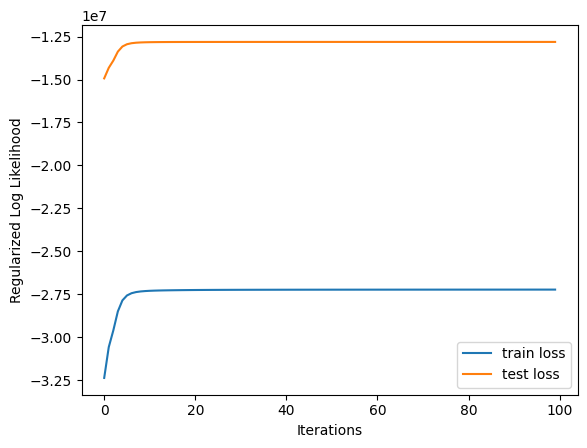

In [11]:
plt.plot(losses_latent_traink2, label='train loss')
plt.plot(losses_latent_testk2, label='test loss')
plt.xlabel('Iterations')
plt.ylabel('Regularized Log Likelihood')
plt.legend()
# plt.savefig("Bias & Latent-loss_splitdata(25m)k2.pdf", format="pdf", bbox_inches="tight")
plt.show()

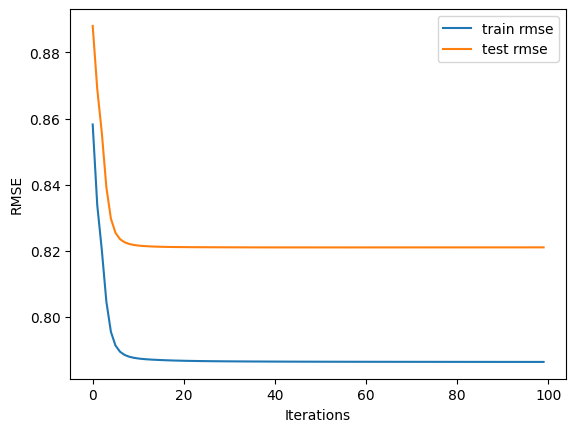

In [12]:
plt.plot(rmse_latent_traink2, label='train rmse')
plt.plot(rmse_latent_testk2, label='test rmse')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
# plt.savefig("Bias & Latent-rmse_splitdata(25m)k2.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Plotting 2D embeddings for Item Vector**

In [14]:
embeddings = item_factor_traink2

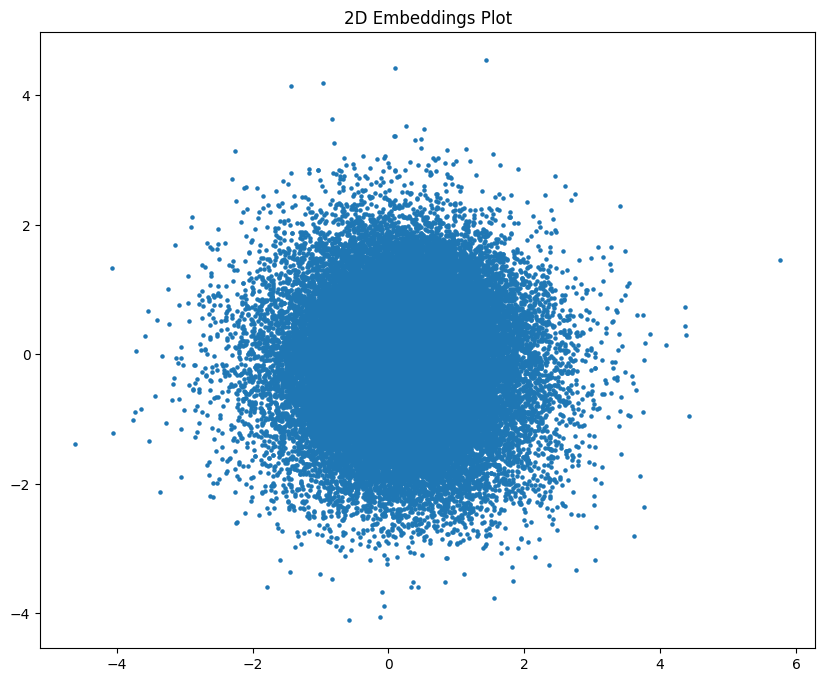

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(embeddings[:,0], embeddings[:,1], s=5)
plt.title('2D Embeddings Plot')
plt.show()

In [16]:
with open('train_movie_data.pkl', 'rb') as f:
    train_movie_data = pickle.load(f)
    
with open('test_movie_data.pkl', 'rb') as f:
    test_movie_data = pickle.load(f)

In [43]:
with open('train_user_data.pkl', 'rb') as f:
    train_user_data = pickle.load(f)
    
with open('test_user_data.pkl', 'rb') as f:
    test_user_data = pickle.load(f)

In [17]:
all_movie_data = []

for datalist, datalists in zip(train_movie_data, test_movie_data):
    all_movie_data.append(datalist + datalists)

In [18]:
popular_movies_index = []

for index, movie in enumerate(all_movie_data):
    if len(movie) > 800:
        popular_movies_index.append(index)

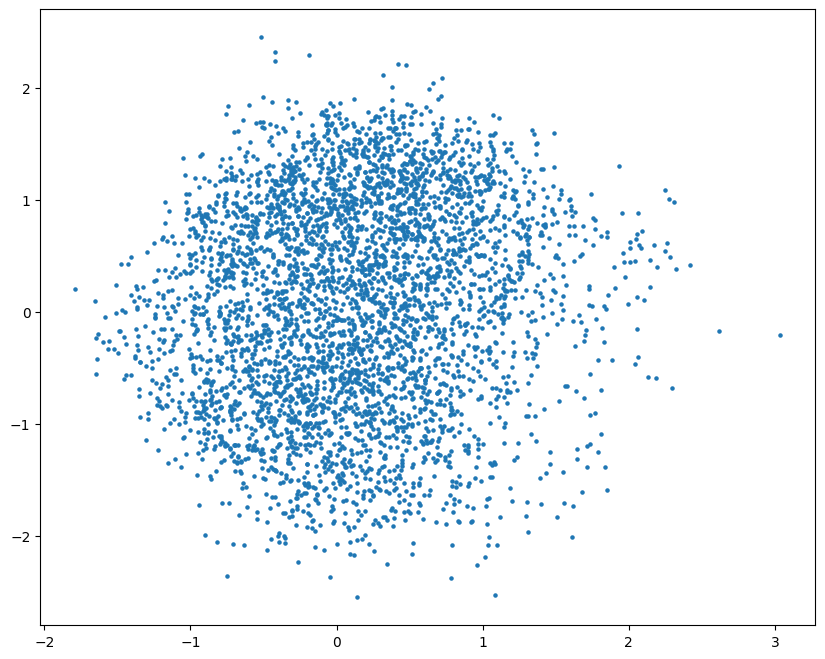

In [19]:
embeddings_popular = item_factor_traink2[popular_movies_index]
plt.figure(figsize=(10,8))
plt.scatter(embeddings_popular[:,0], embeddings_popular[:,1], s=5)
# plt.title('2D Embeddings Plot')
plt.show()

In [27]:
feature_vectors = []

for index, row in moviesdf.iterrows():
  gen_list = row['genres'].split('|')
  feature_vector = np.zeros(len(unique_genres), dtype = int)

  for genre in gen_list:
    if genre in unique_genres:
      feature_vector[np.where(unique_genres == genre)] = 1

  feature_vectors.append(feature_vector)

In [28]:
moviesdf['feature_vectors'] = feature_vectors

In [29]:
genre_movie_ids = {}

for genre_index, genre in enumerate(unique_genres):

  genre_movie_ids[genre] = []

  for index, row in moviesdf.iterrows():
    if row['feature_vectors'][genre_index] == 1:
      genre_movie_ids[genre].append(row['movieId'])

In [33]:
genre_movie_indexes = {}

for genre in unique_genres:
  genre_movie_indexes[genre] = []

  for movie_id in genre_movie_ids[genre]:
    try:
      index = movie_to_idx[movie_id]
      genre_movie_indexes[genre].append(index)
    except KeyError:
      continue

In [34]:
popular_genre_movie_indexes = {}

for genre in unique_genres:
    popular_genre_movie_indexes[genre] = []

    for index in popular_movies_index:
        if index in genre_movie_indexes[genre]:
            popular_genre_movie_indexes[genre].append(index)

In [35]:
emb1 = item_factor_traink2[popular_genre_movie_indexes['Children']]
emb2 = item_factor_traink2[popular_genre_movie_indexes['Horror']]
emb3 = item_factor_traink2[popular_genre_movie_indexes['Sci-Fi']]

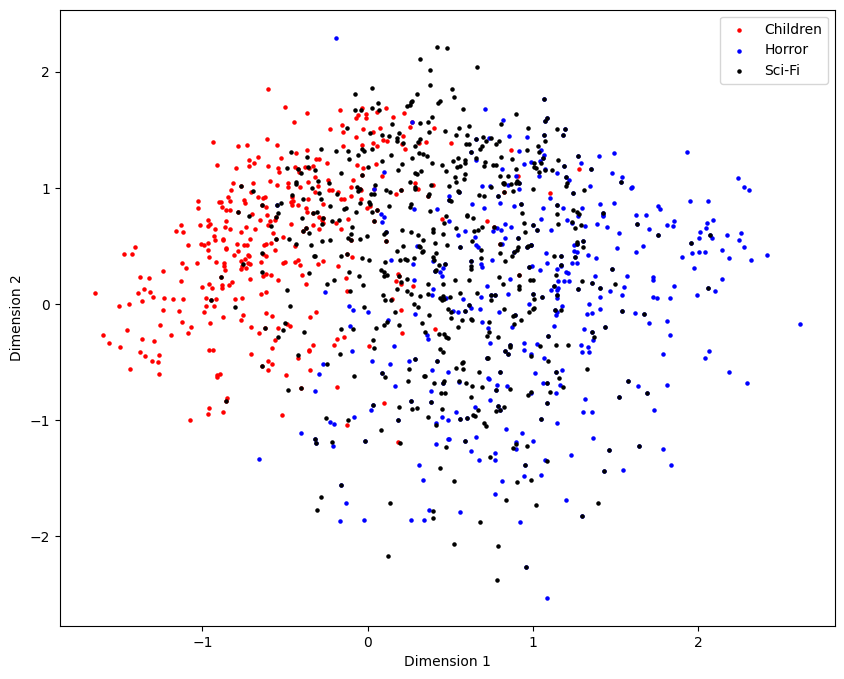

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(emb1[:,0], emb1[:,1], s=5, label = 'Children', color='red')
plt.scatter(emb2[:,0], emb2[:,1], s=5, label = 'Horror', color='blue')
plt.scatter(emb3[:,0], emb3[:,1], s=5, label = 'Sci-Fi', color='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.savefig("2D embeddings plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Model with Feature Embeddings**

In [40]:
id_to_featvec = moviesdf.set_index('movieId').to_dict()['feature_vectors']

In [41]:
feature_vectors = np.zeros((len(moviesdf['movieId']), len(unique_genres)), dtype=int)

for id in id_to_featvec.keys():
  try:
    movindex = movie_to_idx[id]
    feature_vectors[movindex] = id_to_featvec[id]
  except KeyError:
    continue

  0%|                                                   | 0/100 [00:00<?, ?it/s]

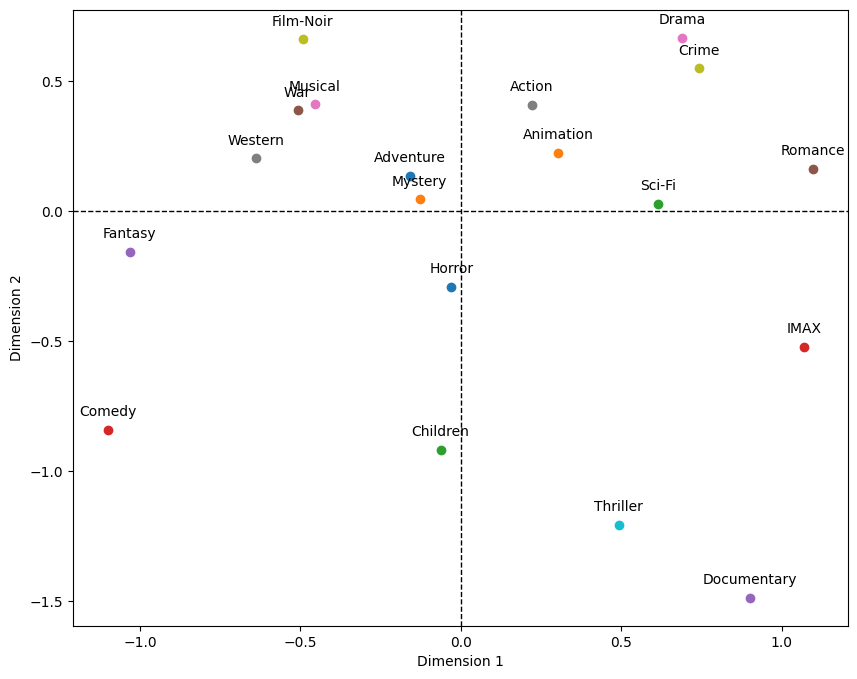

  1%|▍                                          | 1/100 [00:09<16:00,  9.70s/it]

train rmse 0.8581435800721307 test rmse 0.8867449588654387


  2%|▊                                          | 2/100 [00:18<15:16,  9.35s/it]

train rmse 0.8341565815847187 test rmse 0.8673134481855979


  3%|█▎                                         | 3/100 [00:28<15:05,  9.34s/it]

train rmse 0.820820672298106 test rmse 0.8541433773758477


  4%|█▋                                         | 4/100 [00:37<14:47,  9.24s/it]

train rmse 0.8088354486273195 test rmse 0.8418259930187441


  5%|██▏                                        | 5/100 [00:46<14:32,  9.18s/it]

train rmse 0.8018814303678058 test rmse 0.8347969873647771


  6%|██▌                                        | 6/100 [00:55<14:21,  9.16s/it]

train rmse 0.7975171123973873 test rmse 0.8304837823044778


  7%|███                                        | 7/100 [01:04<14:11,  9.15s/it]

train rmse 0.7945962919177453 test rmse 0.8276312422707044


  8%|███▍                                       | 8/100 [01:13<14:02,  9.16s/it]

train rmse 0.7927088832890011 test rmse 0.8257495347172392


  9%|███▊                                       | 9/100 [01:22<13:51,  9.14s/it]

train rmse 0.7914030048694105 test rmse 0.824436100678107


 10%|████▏                                     | 10/100 [01:31<13:40,  9.11s/it]

train rmse 0.7904156119450501 test rmse 0.8234308418220833


 11%|████▌                                     | 11/100 [01:40<13:30,  9.10s/it]

train rmse 0.7896444788462261 test rmse 0.8226379268976511


 12%|█████                                     | 12/100 [01:50<13:20,  9.10s/it]

train rmse 0.789043085343471 test rmse 0.8220215979600578


 13%|█████▍                                    | 13/100 [01:59<13:10,  9.08s/it]

train rmse 0.7885791763012562 test rmse 0.821554780632043


 14%|█████▉                                    | 14/100 [02:08<13:00,  9.07s/it]

train rmse 0.7882253755117848 test rmse 0.8212081158667054


 15%|██████▎                                   | 15/100 [02:17<12:50,  9.06s/it]

train rmse 0.7879574051064069 test rmse 0.8209543643098449


 16%|██████▋                                   | 16/100 [02:26<12:41,  9.06s/it]

train rmse 0.7877549955582042 test rmse 0.8207704430262596


 17%|███████▏                                  | 17/100 [02:35<12:32,  9.07s/it]

train rmse 0.7876011445465643 test rmse 0.8206378171107813


 18%|███████▌                                  | 18/100 [02:44<12:22,  9.06s/it]

train rmse 0.7874796820909525 test rmse 0.8205434807432799


 19%|███████▉                                  | 19/100 [02:53<12:13,  9.06s/it]

train rmse 0.7873842127178317 test rmse 0.8204754735698667


 20%|████████▍                                 | 20/100 [03:02<12:08,  9.11s/it]

train rmse 0.7873119192865679 test rmse 0.820427452867545


 21%|████████▊                                 | 21/100 [03:11<11:58,  9.10s/it]

train rmse 0.7872565895876074 test rmse 0.8203944707290375


 22%|█████████▏                                | 22/100 [03:20<11:49,  9.10s/it]

train rmse 0.7872131976405988 test rmse 0.8203714127207402


 23%|█████████▋                                | 23/100 [03:29<11:39,  9.08s/it]

train rmse 0.7871784154571229 test rmse 0.8203550664908785


 24%|██████████                                | 24/100 [03:38<11:29,  9.08s/it]

train rmse 0.787149962531241 test rmse 0.8203433580840658


 25%|██████████▌                               | 25/100 [03:47<11:20,  9.07s/it]

train rmse 0.7871262049349276 test rmse 0.8203349036555495


 26%|██████████▉                               | 26/100 [03:57<11:10,  9.07s/it]

train rmse 0.7871059606022421 test rmse 0.8203287649552639


 27%|███████████▎                              | 27/100 [04:06<11:03,  9.08s/it]

train rmse 0.7870883577736848 test rmse 0.8203242659070668


 28%|███████████▊                              | 28/100 [04:15<11:01,  9.18s/it]

train rmse 0.7870728608583859 test rmse 0.8203208573863022


 29%|████████████▏                             | 29/100 [04:24<10:52,  9.19s/it]

train rmse 0.7870590797664119 test rmse 0.8203181847347119


 30%|████████████▌                             | 30/100 [04:33<10:40,  9.16s/it]

train rmse 0.7870466297444167 test rmse 0.8203161084452667


 31%|█████████████                             | 31/100 [04:43<10:31,  9.15s/it]

train rmse 0.7870352213519002 test rmse 0.8203144556244065


 32%|█████████████▍                            | 32/100 [04:52<10:19,  9.12s/it]

train rmse 0.7870246359187985 test rmse 0.8203131944009432


 33%|█████████████▊                            | 33/100 [05:01<10:09,  9.09s/it]

train rmse 0.787014770319191 test rmse 0.8203125828221676


 34%|██████████████▎                           | 34/100 [05:10<10:01,  9.11s/it]

train rmse 0.78700561823154 test rmse 0.8203123385702368


 35%|██████████████▋                           | 35/100 [05:19<09:51,  9.10s/it]

train rmse 0.7869970555033231 test rmse 0.8203119187870508


 36%|███████████████                           | 36/100 [05:28<09:41,  9.08s/it]

train rmse 0.7869889623617161 test rmse 0.8203113840524972


 37%|███████████████▌                          | 37/100 [05:37<09:32,  9.09s/it]

train rmse 0.786981261518555 test rmse 0.8203107822560735


 38%|███████████████▉                          | 38/100 [05:46<09:22,  9.08s/it]

train rmse 0.7869738910460495 test rmse 0.8203101254960843


 39%|████████████████▍                         | 39/100 [05:55<09:14,  9.10s/it]

train rmse 0.7869667807405792 test rmse 0.8203094663144761


 40%|████████████████▊                         | 40/100 [06:04<09:05,  9.09s/it]

train rmse 0.7869598567255075 test rmse 0.8203089087055716


 41%|█████████████████▏                        | 41/100 [06:13<08:56,  9.10s/it]

train rmse 0.7869532458668335 test rmse 0.8203083026168619


 42%|█████████████████▋                        | 42/100 [06:22<08:48,  9.11s/it]

train rmse 0.7869469515767551 test rmse 0.8203074841090542


 43%|██████████████████                        | 43/100 [06:32<08:38,  9.09s/it]

train rmse 0.7869408942338993 test rmse 0.8203066152545836


 44%|██████████████████▍                       | 44/100 [06:41<08:28,  9.07s/it]

train rmse 0.7869350394789048 test rmse 0.8203057827242489


 45%|██████████████████▉                       | 45/100 [06:50<08:18,  9.07s/it]

train rmse 0.7869293686982832 test rmse 0.8203050308194663


 46%|███████████████████▎                      | 46/100 [06:59<08:09,  9.06s/it]

train rmse 0.7869238695220068 test rmse 0.8203043920352648


 47%|███████████████████▋                      | 47/100 [07:08<07:59,  9.05s/it]

train rmse 0.7869185320974428 test rmse 0.820303891599569


 48%|████████████████████▏                     | 48/100 [07:17<07:52,  9.08s/it]

train rmse 0.7869133473758444 test rmse 0.8203035361844041


 49%|████████████████████▌                     | 49/100 [07:26<07:47,  9.16s/it]

train rmse 0.7869083076655803 test rmse 0.8203032968080395


 50%|█████████████████████                     | 50/100 [07:35<07:37,  9.16s/it]

train rmse 0.7869034076296624 test rmse 0.8203031227249802


 51%|█████████████████████▍                    | 51/100 [07:44<07:26,  9.12s/it]

train rmse 0.7868986447976265 test rmse 0.8203029717097374


 52%|█████████████████████▊                    | 52/100 [07:53<07:16,  9.09s/it]

train rmse 0.786894020797671 test rmse 0.8203028101240918


 53%|██████████████████████▎                   | 53/100 [08:02<07:07,  9.09s/it]

train rmse 0.7868895398836498 test rmse 0.8203026048067366


 54%|██████████████████████▋                   | 54/100 [08:12<06:58,  9.10s/it]

train rmse 0.7868852044312423 test rmse 0.8203023275815546


 55%|███████████████████████                   | 55/100 [08:21<06:49,  9.10s/it]

train rmse 0.7868810119458312 test rmse 0.8203019638937596


 56%|███████████████████████▌                  | 56/100 [08:30<06:39,  9.09s/it]

train rmse 0.786876955698312 test rmse 0.8203015151995705


 57%|███████████████████████▉                  | 57/100 [08:39<06:30,  9.08s/it]

train rmse 0.7868730270761718 test rmse 0.820300994572588


 58%|████████████████████████▎                 | 58/100 [08:48<06:21,  9.08s/it]

train rmse 0.7868692174310263 test rmse 0.8203004204235471


 59%|████████████████████████▊                 | 59/100 [08:57<06:11,  9.07s/it]

train rmse 0.7868655188440199 test rmse 0.82029981200658


 60%|█████████████████████████▏                | 60/100 [09:06<06:03,  9.08s/it]

train rmse 0.786861924196049 test rmse 0.8202991875051955


 61%|█████████████████████████▌                | 61/100 [09:15<05:53,  9.06s/it]

train rmse 0.7868584270151796 test rmse 0.8202985641987213


 62%|██████████████████████████                | 62/100 [09:24<05:44,  9.06s/it]

train rmse 0.7868550212470143 test rmse 0.8202979609813172


 63%|██████████████████████████▍               | 63/100 [09:33<05:35,  9.06s/it]

train rmse 0.78685170020818 test rmse 0.8202974063640253


 64%|██████████████████████████▉               | 64/100 [09:42<05:25,  9.05s/it]

train rmse 0.7868484526841263 test rmse 0.8202969572933008


 65%|███████████████████████████▎              | 65/100 [09:51<05:16,  9.06s/it]

train rmse 0.7868452605021256 test rmse 0.8202967095211033


 66%|███████████████████████████▋              | 66/100 [10:00<05:07,  9.06s/it]

train rmse 0.7868421270924297 test rmse 0.8202966668854835


 67%|████████████████████████████▏             | 67/100 [10:09<04:58,  9.06s/it]

train rmse 0.7868390869036296 test rmse 0.8202965875846701


 68%|████████████████████████████▌             | 68/100 [10:18<04:49,  9.06s/it]

train rmse 0.7868361469590693 test rmse 0.8202963813981912


 69%|████████████████████████████▉             | 69/100 [10:28<04:40,  9.06s/it]

train rmse 0.7868332975757957 test rmse 0.8202961087850907


 70%|█████████████████████████████▍            | 70/100 [10:37<04:33,  9.10s/it]

train rmse 0.7868305302982536 test rmse 0.8202958023948669


 71%|█████████████████████████████▊            | 71/100 [10:46<04:23,  9.09s/it]

train rmse 0.7868278403382412 test rmse 0.8202954747448551


 72%|██████████████████████████████▏           | 72/100 [10:55<04:14,  9.11s/it]

train rmse 0.7868252251739342 test rmse 0.8202951254344075


 73%|██████████████████████████████▋           | 73/100 [11:04<04:05,  9.10s/it]

train rmse 0.7868226828174143 test rmse 0.8202947457456248


 74%|███████████████████████████████           | 74/100 [11:13<03:57,  9.12s/it]

train rmse 0.7868202108481924 test rmse 0.8202943264721616


 75%|███████████████████████████████▌          | 75/100 [11:22<03:47,  9.09s/it]

train rmse 0.7868178063451255 test rmse 0.8202938634834755


 76%|███████████████████████████████▉          | 76/100 [11:31<03:38,  9.10s/it]

train rmse 0.786815466243109 test rmse 0.820293358362822


 77%|████████████████████████████████▎         | 77/100 [11:40<03:29,  9.12s/it]

train rmse 0.786813187644537 test rmse 0.8202928161882863


 78%|████████████████████████████████▊         | 78/100 [11:50<03:19,  9.09s/it]

train rmse 0.7868109679354903 test rmse 0.8202922431140909


 79%|█████████████████████████████████▏        | 79/100 [11:59<03:10,  9.07s/it]

train rmse 0.7868088047686573 test rmse 0.8202916449014891


 80%|█████████████████████████████████▌        | 80/100 [12:08<03:01,  9.09s/it]

train rmse 0.7868066960140546 test rmse 0.8202910264544856


 81%|██████████████████████████████████        | 81/100 [12:17<02:52,  9.10s/it]

train rmse 0.7868046397574889 test rmse 0.820290392119713


 82%|██████████████████████████████████▍       | 82/100 [12:26<02:43,  9.10s/it]

train rmse 0.7868026343883534 test rmse 0.8202897464704659


 83%|██████████████████████████████████▊       | 83/100 [12:35<02:34,  9.08s/it]

train rmse 0.7868006787056286 test rmse 0.820289095023163


 84%|███████████████████████████████████▎      | 84/100 [12:44<02:25,  9.06s/it]

train rmse 0.7867987718251284 test rmse 0.820288443969085


 85%|███████████████████████████████████▋      | 85/100 [12:53<02:15,  9.05s/it]

train rmse 0.7867969128337396 test rmse 0.820287798660281


 86%|████████████████████████████████████      | 86/100 [13:02<02:07,  9.09s/it]

train rmse 0.7867951005409003 test rmse 0.8202871622254564


 87%|████████████████████████████████████▌     | 87/100 [13:11<01:58,  9.15s/it]

train rmse 0.7867933335484102 test rmse 0.820286535595508


 88%|████████████████████████████████████▉     | 88/100 [13:21<01:50,  9.17s/it]

train rmse 0.7867916104335597 test rmse 0.8202859184107123


 89%|█████████████████████████████████████▍    | 89/100 [13:30<01:40,  9.17s/it]

train rmse 0.7867899298510272 test rmse 0.8202853098227094


 90%|█████████████████████████████████████▊    | 90/100 [13:39<01:31,  9.13s/it]

train rmse 0.7867882905503919 test rmse 0.8202847089172481


 91%|██████████████████████████████████████▏   | 91/100 [13:48<01:22,  9.13s/it]

train rmse 0.786786691361082 test rmse 0.820284114879597


 92%|██████████████████████████████████████▋   | 92/100 [13:57<01:12,  9.10s/it]

train rmse 0.7867851311748006 test rmse 0.8202835270381471


 93%|███████████████████████████████████████   | 93/100 [14:06<01:03,  9.08s/it]

train rmse 0.7867836089333111 test rmse 0.8202829448590137


 94%|███████████████████████████████████████▍  | 94/100 [14:15<00:54,  9.08s/it]

train rmse 0.7867821236221484 test rmse 0.8202823679249863


 95%|███████████████████████████████████████▉  | 95/100 [14:24<00:45,  9.06s/it]

train rmse 0.7867806742678582 test rmse 0.8202817959124173


 96%|████████████████████████████████████████▎ | 96/100 [14:33<00:36,  9.05s/it]

train rmse 0.7867792599370509 test rmse 0.8202812285701362


 97%|████████████████████████████████████████▋ | 97/100 [14:42<00:27,  9.06s/it]

train rmse 0.7867778797350521 test rmse 0.820280665701008


 98%|█████████████████████████████████████████▏| 98/100 [14:51<00:18,  9.06s/it]

train rmse 0.7867765327983304 test rmse 0.8202801071423969


 99%|█████████████████████████████████████████▌| 99/100 [15:00<00:09,  9.06s/it]

train rmse 0.7867752182638731 test rmse 0.8202795527387469


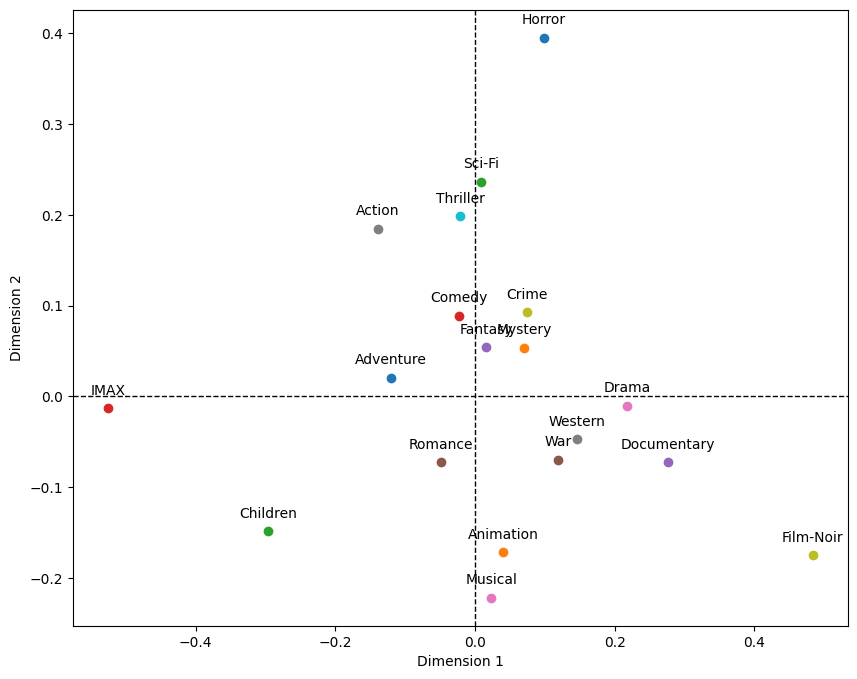

100%|█████████████████████████████████████████| 100/100 [15:10<00:00,  9.10s/it]

train rmse 0.786773935153556 test rmse 0.8202790022860407


In [46]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 2

M = len(train_user_data)
N = len(train_movie_data)
num_features = len(unique_genres)

user_biases_train = np.zeros((M))
item_biases_train = np.zeros((N))
user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))
feature_embedding = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (num_features, K))

losses_latent_train = []
losses_latent_test = []
rmse_latent_train = []
rmse_latent_test = []


def plot_genre_feature(feature_embedding, genres, file):
    plt.figure(figsize=(10, 8))

    for q, genre in enumerate(genres):
        plt.scatter(feature_embedding[q, 0], feature_embedding[q, 1])
        plt.annotate(genre, (feature_embedding[q, 0], feature_embedding[q, 1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.savefig(file)
    plt.show()

for i in tqdm(range(epochs)):
    if i == 0:
        plot_genre_feature(feature_embedding, unique_genres,'featgen1.pdf')
    elif i == epochs - 1:
        plot_genre_feature(feature_embedding, unique_genres,'featgen2.pdf')


    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[indices]) - item_biases_train[indices]) / (lam * len(indices) + gamm)
            user_biases_train[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_train[indices], item_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_train[indices], ratings - user_bias_train - item_biases_train[indices]), axis=0)

            # Update user factor
            user_factor_train[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)


            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_train[indices], item_factor_train[n]) - user_biases_train[indices]) / (lam * len(indices) + gamm)
            item_biases_train[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_train[indices], user_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_train[indices], ratings - user_biases_train[indices] - item_bias_train), axis=0)

            actual_right = right + tau * (1/(np.sqrt(np.sum(feature_vectors[n])) + 1)) * np.dot(feature_vectors[n], feature_embedding)
            # Update item factor
            item_factor_train[n] = np.linalg.solve(left + tau * np.eye(K), actual_right)

    for i in range(num_features):
        indices = np.where(feature_vectors[:, i] == 1)
        feature_sums = np.sum(feature_vectors[indices], axis=1)
        features_except_i = np.delete(feature_vectors, i, axis=1)[indices]
        F_except_i = np.delete(feature_embedding, i, axis=0)
        # calculate feature update
        total_right = np.sum(np.einsum('ij, i -> ij', item_factor_train[indices], 1/np.sqrt(feature_sums))
                             - np.einsum('i, ij-> ij', 1/feature_sums , np.einsum('ij, jk -> ik', features_except_i, F_except_i)), axis=0) # calculate feature update

        feature_embedding[i] = total_right/(np.sum(1/np.sqrt(feature_sums)) - 1)

    # # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[train_indices]) - user_biases_train[m] - item_biases_train[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[test_indices]) - user_biases_train[m] - item_biases_train[test_indices])**2)
            test_size += len(test_indices)

    # train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_train, item_factor_train) + np.einsum('ij,ij->', user_factor_train, user_factor_train))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    # losses_latent_train.append(train_loss)
    rmse_latent_train.append(train_rmse)

    # test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_train, item_factor_train) + np.einsum('ij, ij->', user_factor_train, user_factor_train))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    # losses_latent_test.append(test_loss)
    rmse_latent_test.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

In [47]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 10

M = len(train_user_data)
N = len(train_movie_data)
num_features = len(unique_genres)

user_biases_train = np.zeros((M))
item_biases_train = np.zeros((N))
user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))
feature_embedding = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (num_features, K))

losses_latent_train = []
losses_latent_test = []
rmse_latent_train = []
rmse_latent_test = []

for i in tqdm(range(epochs)):

    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[indices]) - item_biases_train[indices]) / (lam * len(indices) + gamm)
            user_biases_train[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_train[indices], item_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_train[indices], ratings - user_bias_train - item_biases_train[indices]), axis=0)

            # Update user factor
            user_factor_train[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)


            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_train[indices], item_factor_train[n]) - user_biases_train[indices]) / (lam * len(indices) + gamm)
            item_biases_train[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_train[indices], user_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_train[indices], ratings - user_biases_train[indices] - item_bias_train), axis=0)

            actual_right = right + tau * (1/(np.sqrt(np.sum(feature_vectors[n])) + 1)) * np.dot(feature_vectors[n], feature_embedding)
            # Update item factor
            item_factor_train[n] = np.linalg.solve(left + tau * np.eye(K), actual_right)

    for i in range(num_features):
        indices = np.where(feature_vectors[:, i] == 1)
        feature_sums = np.sum(feature_vectors[indices], axis=1)
        features_except_i = np.delete(feature_vectors, i, axis=1)[indices]
        F_except_i = np.delete(feature_embedding, i, axis=0)
        # calculate feature update
        total_right = np.sum(np.einsum('ij, i -> ij', item_factor_train[indices], 1/np.sqrt(feature_sums))
                             - np.einsum('i, ij-> ij', 1/feature_sums , np.einsum('ij, jk -> ik', features_except_i, F_except_i)), axis=0) # calculate feature update

        feature_embedding[i] = total_right/(np.sum(1/np.sqrt(feature_sums)) - 1)

    # # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[train_indices]) - user_biases_train[m] - item_biases_train[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[test_indices]) - user_biases_train[m] - item_biases_train[test_indices])**2)
            test_size += len(test_indices)

    # train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_train, item_factor_train) + np.einsum('ij,ij->', user_factor_train, user_factor_train))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    # losses_latent_train.append(train_loss)
    rmse_latent_train.append(train_rmse)

    # test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_train, item_factor_train) + np.einsum('ij, ij->', user_factor_train, user_factor_train))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    # losses_latent_test.append(test_loss)
    rmse_latent_test.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

  1%|▍                                          | 1/100 [00:14<24:14, 14.69s/it]

train rmse 0.8193270089714649 test rmse 0.9215047817231515


  2%|▊                                          | 2/100 [00:30<24:44, 15.15s/it]

train rmse 0.7740136053440521 test rmse 0.8921659432635561


  3%|█▎                                         | 3/100 [00:45<24:28, 15.14s/it]

train rmse 0.7451571511668694 test rmse 0.8657053036526445


  4%|█▋                                         | 4/100 [01:00<24:33, 15.35s/it]

train rmse 0.7278484071649418 test rmse 0.8486403902585815


  5%|██▏                                        | 5/100 [01:16<24:21, 15.38s/it]

train rmse 0.7174525195088493 test rmse 0.8378271908432193


  6%|██▌                                        | 6/100 [01:31<23:44, 15.15s/it]

train rmse 0.7108182154303418 test rmse 0.8306338038585244


  7%|███                                        | 7/100 [01:45<23:06, 14.91s/it]

train rmse 0.7063447405736845 test rmse 0.8256360668113558


  8%|███▍                                       | 8/100 [01:59<22:33, 14.71s/it]

train rmse 0.7031638741902114 test rmse 0.8219891908009832


  9%|███▊                                       | 9/100 [02:14<22:07, 14.58s/it]

train rmse 0.7008001156987096 test rmse 0.8192229075943382


 10%|████▏                                     | 10/100 [02:28<21:46, 14.52s/it]

train rmse 0.6989927405789972 test rmse 0.8170890992939804


 11%|████▌                                     | 11/100 [02:42<21:26, 14.45s/it]

train rmse 0.6975903600991276 test rmse 0.8154443935885854


 12%|█████                                     | 12/100 [02:57<21:07, 14.41s/it]

train rmse 0.6964947998819707 test rmse 0.8141883301260587


 13%|█████▍                                    | 13/100 [03:11<20:51, 14.38s/it]

train rmse 0.6956356178816925 test rmse 0.8132341527066194


 14%|█████▉                                    | 14/100 [03:25<20:36, 14.38s/it]

train rmse 0.6949587810135791 test rmse 0.8125135209290659


 15%|██████▎                                   | 15/100 [03:40<20:20, 14.36s/it]

train rmse 0.6944218861363882 test rmse 0.8119744360884537


 16%|██████▋                                   | 16/100 [03:54<20:04, 14.34s/it]

train rmse 0.6939920670053216 test rmse 0.8115757534467326


 17%|███████▏                                  | 17/100 [04:08<19:47, 14.31s/it]

train rmse 0.6936443643971822 test rmse 0.8112850557321618


 18%|███████▌                                  | 18/100 [04:24<19:59, 14.63s/it]

train rmse 0.6933602079424124 test rmse 0.8110759105922888


 19%|███████▉                                  | 19/100 [04:38<19:37, 14.54s/it]

train rmse 0.6931257566349837 test rmse 0.8109261869869431


 20%|████████▍                                 | 20/100 [04:52<19:19, 14.49s/it]

train rmse 0.692930319693006 test rmse 0.8108200116762712


 21%|████████▊                                 | 21/100 [05:07<19:01, 14.45s/it]

train rmse 0.6927656529694115 test rmse 0.810746764819443


 22%|█████████▏                                | 22/100 [05:21<18:42, 14.39s/it]

train rmse 0.6926254882220382 test rmse 0.8106986471420471


 23%|█████████▋                                | 23/100 [05:35<18:25, 14.36s/it]

train rmse 0.6925050021103617 test rmse 0.8106699790134221


 24%|██████████                                | 24/100 [05:49<18:09, 14.34s/it]

train rmse 0.6924004380202726 test rmse 0.8106567498547952


 25%|██████████▌                               | 25/100 [06:04<17:54, 14.32s/it]

train rmse 0.692308903247014 test rmse 0.8106556405066938


 26%|██████████▉                               | 26/100 [06:18<17:37, 14.30s/it]

train rmse 0.6922281605491235 test rmse 0.810663956247212


 27%|███████████▎                              | 27/100 [06:32<17:23, 14.29s/it]

train rmse 0.6921564521405262 test rmse 0.8106795248808344


 28%|███████████▊                              | 28/100 [06:46<17:07, 14.27s/it]

train rmse 0.6920923930346574 test rmse 0.8107006314058303


 29%|████████████▏                             | 29/100 [07:01<16:52, 14.26s/it]

train rmse 0.692034937807485 test rmse 0.8107255772740014


 30%|████████████▌                             | 30/100 [07:15<16:38, 14.26s/it]

train rmse 0.6919831473576404 test rmse 0.8107535187642732


 31%|█████████████                             | 31/100 [07:29<16:22, 14.25s/it]

train rmse 0.6919362581510183 test rmse 0.8107838928539479


 32%|█████████████▍                            | 32/100 [07:43<16:09, 14.25s/it]

train rmse 0.6918936357278516 test rmse 0.8108161498648204


 33%|█████████████▊                            | 33/100 [07:58<15:59, 14.33s/it]

train rmse 0.6918547753804021 test rmse 0.8108498191374642


 34%|██████████████▎                           | 34/100 [08:12<15:44, 14.32s/it]

train rmse 0.6918193075239841 test rmse 0.8108843913542625


 35%|██████████████▋                           | 35/100 [08:27<15:30, 14.32s/it]

train rmse 0.6917868200084408 test rmse 0.8109196263608163


 36%|███████████████                           | 36/100 [08:41<15:16, 14.32s/it]

train rmse 0.6917569829607135 test rmse 0.8109552797925644


 37%|███████████████▌                          | 37/100 [08:55<15:01, 14.31s/it]

train rmse 0.6917295197501261 test rmse 0.810991123222194


 38%|███████████████▉                          | 38/100 [09:09<14:46, 14.30s/it]

train rmse 0.6917041911375926 test rmse 0.8110269460581018


 39%|████████████████▍                         | 39/100 [09:24<14:33, 14.32s/it]

train rmse 0.6916807805701001 test rmse 0.8110625893230766


 40%|████████████████▊                         | 40/100 [09:38<14:18, 14.31s/it]

train rmse 0.6916590888645919 test rmse 0.8110979628326803


 41%|█████████████████▏                        | 41/100 [09:52<14:04, 14.32s/it]

train rmse 0.691638934769407 test rmse 0.8111330311300501


 42%|█████████████████▋                        | 42/100 [10:07<13:50, 14.32s/it]

train rmse 0.6916201485381681 test rmse 0.8111677968175023


 43%|██████████████████                        | 43/100 [10:21<13:35, 14.30s/it]

train rmse 0.6916025863006723 test rmse 0.811202220696761


 44%|██████████████████▍                       | 44/100 [10:35<13:21, 14.31s/it]

train rmse 0.6915861908517862 test rmse 0.8112361120217836


 45%|██████████████████▉                       | 45/100 [10:50<13:06, 14.30s/it]

train rmse 0.6915708664401282 test rmse 0.8112694891461624


 46%|███████████████████▎                      | 46/100 [11:04<12:52, 14.31s/it]

train rmse 0.6915564996161166 test rmse 0.8113024039534084


 47%|███████████████████▋                      | 47/100 [11:18<12:37, 14.30s/it]

train rmse 0.6915430013808928 test rmse 0.8113348463887127


 48%|████████████████████▏                     | 48/100 [11:32<12:22, 14.28s/it]

train rmse 0.6915302946633372 test rmse 0.8113667885480357


 49%|████████████████████▌                     | 49/100 [11:47<12:09, 14.31s/it]

train rmse 0.6915183104749103 test rmse 0.8113981964673785


 50%|█████████████████████                     | 50/100 [12:01<11:54, 14.30s/it]

train rmse 0.6915069860499095 test rmse 0.8114290381038095


 51%|█████████████████████▍                    | 51/100 [12:15<11:39, 14.28s/it]

train rmse 0.6914962642034079 test rmse 0.8114592925757455


 52%|█████████████████████▊                    | 52/100 [12:30<11:25, 14.28s/it]

train rmse 0.6914860940076637 test rmse 0.811488953401384


 53%|██████████████████████▎                   | 53/100 [12:44<11:10, 14.27s/it]

train rmse 0.69147643174196 test rmse 0.8115180231945894


 54%|██████████████████████▋                   | 54/100 [12:58<10:58, 14.32s/it]

train rmse 0.6914672404131236 test rmse 0.8115465043141431


 55%|███████████████████████                   | 55/100 [13:13<10:44, 14.33s/it]

train rmse 0.6914584872924737 test rmse 0.811574390371127


 56%|███████████████████████▌                  | 56/100 [13:27<10:30, 14.33s/it]

train rmse 0.6914501418339626 test rmse 0.8116016582218197


 57%|███████████████████████▉                  | 57/100 [13:41<10:15, 14.32s/it]

train rmse 0.6914421745772442 test rmse 0.8116282706619145


 58%|████████████████████████▎                 | 58/100 [13:56<10:01, 14.33s/it]

train rmse 0.6914345561879941 test rmse 0.8116541969355135


 59%|████████████████████████▊                 | 59/100 [14:10<09:47, 14.32s/it]

train rmse 0.6914272579086708 test rmse 0.8116794253563288


 60%|█████████████████████████▏                | 60/100 [14:24<09:32, 14.32s/it]

train rmse 0.6914202543892853 test rmse 0.8117039618678434


 61%|█████████████████████████▌                | 61/100 [14:39<09:19, 14.34s/it]

train rmse 0.6914135283934594 test rmse 0.8117278240522541


 62%|██████████████████████████                | 62/100 [14:53<09:04, 14.34s/it]

train rmse 0.6914070704193234 test rmse 0.8117510264063179


 63%|██████████████████████████▍               | 63/100 [15:07<08:51, 14.36s/it]

train rmse 0.6914008705630953 test rmse 0.8117735789358693


 64%|██████████████████████████▉               | 64/100 [15:22<08:37, 14.37s/it]

train rmse 0.6913949144426822 test rmse 0.8117955043469363


 65%|███████████████████████████▎              | 65/100 [15:38<08:41, 14.90s/it]

train rmse 0.6913891858146199 test rmse 0.8118168414811231


 66%|███████████████████████████▋              | 66/100 [15:53<08:33, 15.10s/it]

train rmse 0.6913836695449735 test rmse 0.8118376309397539


 67%|████████████████████████████▏             | 67/100 [16:09<08:19, 15.14s/it]

train rmse 0.6913783525417003 test rmse 0.8118578994203776


 68%|████████████████████████████▌             | 68/100 [16:24<08:04, 15.13s/it]

train rmse 0.6913732234457426 test rmse 0.8118776565803457


 69%|████████████████████████████▉             | 69/100 [16:39<07:48, 15.11s/it]

train rmse 0.6913682720993113 test rmse 0.811896904078308


 70%|█████████████████████████████▍            | 70/100 [16:54<07:32, 15.09s/it]

train rmse 0.6913634892581286 test rmse 0.8119156451700507


 71%|█████████████████████████████▊            | 71/100 [17:09<07:18, 15.11s/it]

train rmse 0.6913588665369538 test rmse 0.8119338877797265


 72%|██████████████████████████████▏           | 72/100 [17:24<07:03, 15.11s/it]

train rmse 0.6913543963766388 test rmse 0.8119516431329347


 73%|██████████████████████████████▋           | 73/100 [17:39<06:48, 15.14s/it]

train rmse 0.6913500718852124 test rmse 0.8119689241826052


 74%|███████████████████████████████           | 74/100 [17:54<06:33, 15.12s/it]

train rmse 0.6913458865781353 test rmse 0.8119857454917097


 75%|███████████████████████████████▌          | 75/100 [18:10<06:18, 15.14s/it]

train rmse 0.6913418341608916 test rmse 0.8120021237742131


 76%|███████████████████████████████▉          | 76/100 [18:25<06:03, 15.14s/it]

train rmse 0.6913379084852506 test rmse 0.8120180774470546


 77%|████████████████████████████████▎         | 77/100 [18:40<05:48, 15.16s/it]

train rmse 0.6913341037055242 test rmse 0.8120336241499493


 78%|████████████████████████████████▊         | 78/100 [18:55<05:33, 15.15s/it]

train rmse 0.691330414547689 test rmse 0.8120487768453725


 79%|█████████████████████████████████▏        | 79/100 [19:10<05:18, 15.16s/it]

train rmse 0.6913268365844538 test rmse 0.8120635409076478


 80%|█████████████████████████████████▌        | 80/100 [19:25<05:03, 15.16s/it]

train rmse 0.6913233665034164 test rmse 0.8120779146722044


 81%|██████████████████████████████████        | 81/100 [19:41<04:47, 15.13s/it]

train rmse 0.6913200022575564 test rmse 0.8120918938256464


 82%|██████████████████████████████████▍       | 82/100 [19:56<04:32, 15.12s/it]

train rmse 0.6913167425575212 test rmse 0.8121054779153868


 83%|██████████████████████████████████▊       | 83/100 [20:11<04:17, 15.12s/it]

train rmse 0.691313585529145 test rmse 0.812118675551006


 84%|███████████████████████████████████▎      | 84/100 [20:26<04:02, 15.13s/it]

train rmse 0.6913105277473236 test rmse 0.8121315048496979


 85%|███████████████████████████████████▋      | 85/100 [20:41<03:47, 15.14s/it]

train rmse 0.6913075645535129 test rmse 0.8121439895415654


 86%|████████████████████████████████████      | 86/100 [20:56<03:31, 15.13s/it]

train rmse 0.6913046909111844 test rmse 0.8121561541717653


 87%|████████████████████████████████████▌     | 87/100 [21:11<03:16, 15.12s/it]

train rmse 0.6913019019592421 test rmse 0.8121680207070621


 88%|████████████████████████████████████▉     | 88/100 [21:26<03:00, 15.08s/it]

train rmse 0.6912991931677362 test rmse 0.8121796069271063


 89%|█████████████████████████████████████▍    | 89/100 [21:41<02:45, 15.08s/it]

train rmse 0.691296560263406 test rmse 0.8121909266951066


 90%|█████████████████████████████████████▊    | 90/100 [21:56<02:30, 15.05s/it]

train rmse 0.6912939990403576 test rmse 0.8122019922686955


 91%|██████████████████████████████████████▏   | 91/100 [22:11<02:15, 15.05s/it]

train rmse 0.6912915051720588 test rmse 0.8122128185109304


 92%|██████████████████████████████████████▋   | 92/100 [22:26<02:00, 15.06s/it]

train rmse 0.6912890743994924 test rmse 0.8122234277888365


 93%|███████████████████████████████████████   | 93/100 [22:41<01:45, 15.05s/it]

train rmse 0.6912867037507644 test rmse 0.8122338483238422


 94%|███████████████████████████████████████▍  | 94/100 [22:57<01:30, 15.07s/it]

train rmse 0.6912843927878674 test rmse 0.8122440936812475


 95%|███████████████████████████████████████▉  | 95/100 [23:12<01:15, 15.04s/it]

train rmse 0.691282141644884 test rmse 0.8122541434977907


 96%|████████████████████████████████████████▎ | 96/100 [23:27<01:00, 15.07s/it]

train rmse 0.6912799483410805 test rmse 0.8122639560516066


 97%|████████████████████████████████████████▋ | 97/100 [23:42<00:45, 15.08s/it]

train rmse 0.6912778097768861 test rmse 0.8122734828260281


 98%|█████████████████████████████████████████▏| 98/100 [23:57<00:30, 15.08s/it]

train rmse 0.6912757238981039 test rmse 0.8122826965598471


 99%|█████████████████████████████████████████▌| 99/100 [24:12<00:15, 15.07s/it]

train rmse 0.6912736897846244 test rmse 0.8122916334895417


100%|█████████████████████████████████████████| 100/100 [24:27<00:00, 14.67s/it]

train rmse 0.6912717059409708 test rmse 0.812300359655748


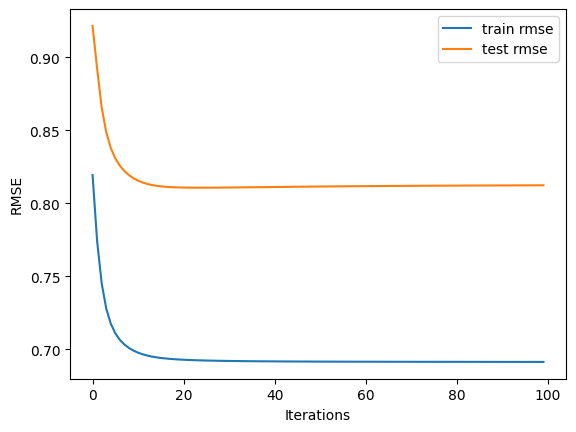

In [48]:
plt.plot(rmse_latent_train, label = 'train rmse')
plt.plot(rmse_latent_test, label = 'test rmse')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.savefig("GenFeats RMSEK10.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [49]:
with open('user_biases_trainembed10.pkl', 'wb') as f:
  pickle.dump(user_biases_train, f)

with open('item_biases_trainembed10.pkl', 'wb') as f:
  pickle.dump(item_biases_train, f)

with open('user_factor_trainembed10.pkl', 'wb') as f:
  pickle.dump(user_factor_train, f)

with open('item_factor_trainembed10.pkl', 'wb') as f:
  pickle.dump(item_factor_train, f)

with open('feature_embedding10.pkl', 'wb') as f:
  pickle.dump(feature_embedding, f)

with open('rmse_latent_trainembed10.pkl', 'wb') as f:
  pickle.dump(rmse_latent_train, f)

with open('rmse_latent_testembed10.pkl', 'wb') as f:
  pickle.dump(rmse_latent_test, f)

In [50]:
from tqdm import tqdm

lam = 5
gamm = 0.1
tau = 1
epochs = 100

K = 20

M = len(train_user_data)
N = len(train_movie_data)
num_features = len(unique_genres)

user_biases_train = np.zeros((M))
item_biases_train = np.zeros((N))
user_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (M,K))
item_factor_train = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (N,K))
feature_embedding = np.random.normal(loc=0, scale= 1/np.sqrt(K), size= (num_features, K))

losses_latent_train = []
losses_latent_test = []
rmse_latent_train = []
rmse_latent_test = []

for i in tqdm(range(epochs)):

    for m in range(M):
        # Extract ratings and indices for the current user
        if len(train_user_data) > 0:
            ratings = train_user_data[m][:, 1]
            indices = train_user_data[m][:, 0].astype(int)

            # Calculate user bias
            user_bias_train = lam * np.sum(ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[indices]) - item_biases_train[indices]) / (lam * len(indices) + gamm)
            user_biases_train[m] = user_bias_train

            # Calculate left and right matrices for user factor update
            left = np.sum(np.einsum('ij,il->ijl', item_factor_train[indices], item_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', item_factor_train[indices], ratings - user_bias_train - item_biases_train[indices]), axis=0)

            # Update user factor
            user_factor_train[m] = np.linalg.solve(lam * left + tau * np.eye(K), lam * right)

    for n in range(N):
        # Extract ratings and indices for the current item
        if len(train_movie_data[n]) > 0:
            ratings = train_movie_data[n][:, 1]
            indices = train_movie_data[n][:, 0].astype(int)


            # Calculate item bias
            item_bias_train = lam * np.sum(ratings - np.einsum('ij,j->i', user_factor_train[indices], item_factor_train[n]) - user_biases_train[indices]) / (lam * len(indices) + gamm)
            item_biases_train[n] = item_bias_train

            # Calculate left and right matrices for item factor update
            left = np.sum(np.einsum('ij,il->ijl', user_factor_train[indices], user_factor_train[indices]), axis=0)
            right = np.sum(np.einsum('ji,j->ji', user_factor_train[indices], ratings - user_biases_train[indices] - item_bias_train), axis=0)

            actual_right = right + tau * (1/(np.sqrt(np.sum(feature_vectors[n])) + 1)) * np.dot(feature_vectors[n], feature_embedding)
            # Update item factor
            item_factor_train[n] = np.linalg.solve(left + tau * np.eye(K), actual_right)

    for i in range(num_features):
        indices = np.where(feature_vectors[:, i] == 1)
        feature_sums = np.sum(feature_vectors[indices], axis=1)
        features_except_i = np.delete(feature_vectors, i, axis=1)[indices]
        F_except_i = np.delete(feature_embedding, i, axis=0)
        # calculate feature update
        total_right = np.sum(np.einsum('ij, i -> ij', item_factor_train[indices], 1/np.sqrt(feature_sums))
                             - np.einsum('i, ij-> ij', 1/feature_sums , np.einsum('ij, jk -> ik', features_except_i, F_except_i)), axis=0) # calculate feature update

        feature_embedding[i] = total_right/(np.sum(1/np.sqrt(feature_sums)) - 1)

    # # Calculate training loss and RMSE
    train_error_squared = 0
    train_size = 0
    test_error_squared = 0
    test_size = 0

    for m in range(M):
        if len(train_user_data[m]) > 0:
            train_ratings = train_user_data[m][:, 1]
            train_indices = train_user_data[m][:, 0].astype(int)
            train_error_squared += np.sum((train_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[train_indices]) - user_biases_train[m] - item_biases_train[train_indices])**2)
            train_size += len(train_indices)

        if len(test_user_data[m]) > 0:
            test_ratings = test_user_data[m][:, 1]
            test_indices = test_user_data[m][:, 0].astype(int)
            test_error_squared += np.sum((test_ratings - np.einsum('i,ji->j', user_factor_train[m], item_factor_train[test_indices]) - user_biases_train[m] - item_biases_train[test_indices])**2)
            test_size += len(test_indices)

    # train_loss = -0.5 * lam * train_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij,ij->', item_factor_train, item_factor_train) + np.einsum('ij,ij->', user_factor_train, user_factor_train))
    train_rmse = np.sqrt(1 / train_size * train_error_squared)

    # losses_latent_train.append(train_loss)
    rmse_latent_train.append(train_rmse)

    # test_loss = -0.5 * lam * test_error_squared - 0.5 * gamm * np.sum(user_biases_train**2) - 0.5 * gamm * np.sum(item_biases_train**2) - 0.5 * tau * (np.einsum('ij, ij->', item_factor_train, item_factor_train) + np.einsum('ij, ij->', user_factor_train, user_factor_train))
    test_rmse = np.sqrt(1/test_size * test_error_squared)

    # losses_latent_test.append(test_loss)
    rmse_latent_test.append(test_rmse)

    print(f'train rmse {train_rmse} test rmse {test_rmse}')

  1%|▍                                          | 1/100 [00:34<56:49, 34.44s/it]

train rmse 0.7775253490180996 test rmse 0.9610533805000097


  2%|▊                                          | 2/100 [01:06<54:25, 33.32s/it]

train rmse 0.7195313369589119 test rmse 0.9231609011207541


  3%|█▎                                         | 3/100 [01:39<53:02, 32.81s/it]

train rmse 0.6896000143119141 test rmse 0.8978971758692091


  4%|█▋                                         | 4/100 [02:11<52:05, 32.55s/it]

train rmse 0.671355448766928 test rmse 0.8812173603917903


  5%|██▏                                        | 5/100 [02:43<51:16, 32.39s/it]

train rmse 0.659926420380368 test rmse 0.8707967905898032


  6%|██▌                                        | 6/100 [03:15<50:45, 32.40s/it]

train rmse 0.6525864101180723 test rmse 0.864355930512627


  7%|███                                        | 7/100 [03:47<50:02, 32.28s/it]

train rmse 0.6475604376773892 test rmse 0.8602096922197756


  8%|███▍                                       | 8/100 [04:20<49:32, 32.31s/it]

train rmse 0.6439164728035768 test rmse 0.8574101204105927


  9%|███▊                                       | 9/100 [04:52<48:53, 32.23s/it]

train rmse 0.6411496144416908 test rmse 0.855430387401228


 10%|████▏                                     | 10/100 [05:24<48:16, 32.19s/it]

train rmse 0.638969242003994 test rmse 0.8539700623587434


 11%|████▌                                     | 11/100 [05:56<47:41, 32.16s/it]

train rmse 0.6372009048165591 test rmse 0.8528607758251652


 12%|█████                                     | 12/100 [06:28<47:02, 32.08s/it]

train rmse 0.6357355738235781 test rmse 0.8520088012236754


 13%|█████▍                                    | 13/100 [07:00<46:23, 31.99s/it]

train rmse 0.6345024096778755 test rmse 0.8513624377329196


 14%|█████▉                                    | 14/100 [07:32<45:48, 31.96s/it]

train rmse 0.6334534963755178 test rmse 0.8508843309937203


 15%|██████▎                                   | 15/100 [08:03<45:14, 31.93s/it]

train rmse 0.6325541821979829 test rmse 0.8505416341490372


 16%|██████▋                                   | 16/100 [08:35<44:40, 31.91s/it]

train rmse 0.6317778485923149 test rmse 0.8503062744029088


 17%|███████▏                                  | 17/100 [09:07<44:06, 31.89s/it]

train rmse 0.6311034690440438 test rmse 0.8501572533101945


 18%|███████▌                                  | 18/100 [09:39<43:33, 31.87s/it]

train rmse 0.6305141951616295 test rmse 0.8500795754937488


 19%|███████▉                                  | 19/100 [10:11<43:03, 31.89s/it]

train rmse 0.6299964300716628 test rmse 0.8500614642394437


 20%|████████▍                                 | 20/100 [10:43<42:31, 31.90s/it]

train rmse 0.6295393049531484 test rmse 0.8500919178422425


 21%|████████▊                                 | 21/100 [11:15<41:58, 31.88s/it]

train rmse 0.6291340129754213 test rmse 0.8501603296160446


 22%|█████████▏                                | 22/100 [11:47<41:26, 31.87s/it]

train rmse 0.6287732317366306 test rmse 0.8502577514614842


 23%|█████████▋                                | 23/100 [12:18<40:56, 31.90s/it]

train rmse 0.628450756013617 test rmse 0.8503773677488093


 24%|██████████                                | 24/100 [12:50<40:25, 31.92s/it]

train rmse 0.6281614002768388 test rmse 0.850513396692142


 25%|██████████▌                               | 25/100 [13:22<39:54, 31.93s/it]

train rmse 0.6279007922418549 test rmse 0.8506607136469371


 26%|██████████▉                               | 26/100 [13:55<39:31, 32.05s/it]

train rmse 0.627665121903281 test rmse 0.8508158698429413


 27%|███████████▎                              | 27/100 [14:27<38:58, 32.04s/it]

train rmse 0.627451110217981 test rmse 0.850976748296419


 28%|███████████▊                              | 28/100 [14:59<38:22, 31.98s/it]

train rmse 0.6272559940875866 test rmse 0.8511419414693907


 29%|████████████▏                             | 29/100 [15:31<37:51, 31.99s/it]

train rmse 0.6270774496639323 test rmse 0.8513104883821231


 30%|████████████▌                             | 30/100 [16:02<37:15, 31.93s/it]

train rmse 0.626913522148749 test rmse 0.8514816188463744


 31%|█████████████                             | 31/100 [16:34<36:43, 31.94s/it]

train rmse 0.6267625698066176 test rmse 0.8516544693388483


 32%|█████████████▍                            | 32/100 [17:06<36:08, 31.89s/it]

train rmse 0.6266231963086772 test rmse 0.8518281256025707


 33%|█████████████▊                            | 33/100 [17:38<35:37, 31.90s/it]

train rmse 0.6264942345107583 test rmse 0.8520019460897722


 34%|██████████████▎                           | 34/100 [18:10<35:03, 31.87s/it]

train rmse 0.6263747559335882 test rmse 0.8521751623814723


 35%|██████████████▋                           | 35/100 [18:42<34:33, 31.90s/it]

train rmse 0.6262638807399321 test rmse 0.8523472320029922


 36%|███████████████                           | 36/100 [19:14<34:03, 31.93s/it]

train rmse 0.6261608243112418 test rmse 0.8525177300644773


 37%|███████████████▌                          | 37/100 [19:46<33:28, 31.88s/it]

train rmse 0.626064901849676 test rmse 0.8526860671091966


 38%|███████████████▉                          | 38/100 [20:17<32:57, 31.89s/it]

train rmse 0.625975515131683 test rmse 0.85285164760292


 39%|████████████████▍                         | 39/100 [20:49<32:25, 31.90s/it]

train rmse 0.6258921222644853 test rmse 0.8530140216349065


 40%|████████████████▊                         | 40/100 [21:21<31:53, 31.88s/it]

train rmse 0.6258142222038405 test rmse 0.8531729278127896


 41%|█████████████████▏                        | 41/100 [21:53<31:19, 31.86s/it]

train rmse 0.6257413543628518 test rmse 0.8533282286817825


 42%|█████████████████▋                        | 42/100 [22:25<30:47, 31.86s/it]

train rmse 0.6256731011518464 test rmse 0.8534798513349603


 43%|██████████████████                        | 43/100 [22:57<30:16, 31.87s/it]

train rmse 0.6256090836921998 test rmse 0.8536277759248473


 44%|██████████████████▍                       | 44/100 [23:29<29:47, 31.92s/it]

train rmse 0.6255489548379294 test rmse 0.8537720380376261


 45%|██████████████████▉                       | 45/100 [24:01<29:16, 31.93s/it]

train rmse 0.6254923940946291 test rmse 0.8539127126165433


 46%|███████████████████▎                      | 46/100 [24:33<28:45, 31.95s/it]

train rmse 0.6254391035627053 test rmse 0.854049895032938


 47%|███████████████████▋                      | 47/100 [25:05<28:12, 31.92s/it]

train rmse 0.625388802045109 test rmse 0.854183700327772


 48%|████████████████████▏                     | 48/100 [25:37<27:51, 32.15s/it]

train rmse 0.6253412199006155 test rmse 0.8543143058169372


 49%|████████████████████▌                     | 49/100 [26:09<27:15, 32.07s/it]

train rmse 0.6252961327553793 test rmse 0.8544419524003626


 50%|█████████████████████                     | 50/100 [26:41<26:40, 32.02s/it]

train rmse 0.6252533991665247 test rmse 0.8545665644845831


 51%|█████████████████████▍                    | 51/100 [27:13<26:05, 31.95s/it]

train rmse 0.6252128620542204 test rmse 0.8546879366639633


 52%|█████████████████████▊                    | 52/100 [27:45<25:31, 31.90s/it]

train rmse 0.6251743464741917 test rmse 0.8548061031185804


 53%|██████████████████████▎                   | 53/100 [28:17<24:58, 31.88s/it]

train rmse 0.62513769795182 test rmse 0.8549211373065237


 54%|██████████████████████▋                   | 54/100 [28:48<24:25, 31.87s/it]

train rmse 0.6251027837345099 test rmse 0.8550331006161079


 55%|███████████████████████                   | 55/100 [29:21<24:06, 32.15s/it]

train rmse 0.6250694864555545 test rmse 0.8551420704723621


 56%|███████████████████████▌                  | 56/100 [29:56<24:09, 32.93s/it]

train rmse 0.6250376985788849 test rmse 0.855248164764024


 57%|███████████████████████▉                  | 57/100 [30:30<23:44, 33.14s/it]

train rmse 0.62500732280265 test rmse 0.8553515152602111


 58%|████████████████████████▎                 | 58/100 [31:03<23:20, 33.35s/it]

train rmse 0.6249782718935241 test rmse 0.8554522215826832


 59%|████████████████████████▊                 | 59/100 [31:36<22:39, 33.15s/it]

train rmse 0.6249504643944445 test rmse 0.8555503826873742


 60%|█████████████████████████▏                | 60/100 [32:11<22:22, 33.56s/it]

train rmse 0.6249238243831281 test rmse 0.8556461245753638


 61%|█████████████████████████▌                | 61/100 [32:45<21:58, 33.82s/it]

train rmse 0.6248982830079312 test rmse 0.8557395706018


 62%|██████████████████████████                | 62/100 [33:17<21:06, 33.32s/it]

train rmse 0.624873778194422 test rmse 0.8558308221462376


 63%|██████████████████████████▍               | 63/100 [33:50<20:23, 33.06s/it]

train rmse 0.6248502534690392 test rmse 0.8559199618690263


 64%|██████████████████████████▉               | 64/100 [34:22<19:37, 32.72s/it]

train rmse 0.6248276568050125 test rmse 0.8560070576576544


 65%|███████████████████████████▎              | 65/100 [34:54<19:06, 32.75s/it]

train rmse 0.624805939898358 test rmse 0.8560921580113966


 66%|███████████████████████████▋              | 66/100 [35:27<18:27, 32.57s/it]

train rmse 0.624785058012768 test rmse 0.85617528583073


 67%|████████████████████████████▏             | 67/100 [35:58<17:48, 32.38s/it]

train rmse 0.6247649699904944 test rmse 0.8562564386906122


 68%|████████████████████████████▌             | 68/100 [36:30<17:11, 32.24s/it]

train rmse 0.6247456378718912 test rmse 0.8563355968070454


 69%|████████████████████████████▉             | 69/100 [37:02<16:37, 32.16s/it]

train rmse 0.6247270264590563 test rmse 0.8564127309491375


 70%|█████████████████████████████▍            | 70/100 [37:34<16:02, 32.10s/it]

train rmse 0.6247091034989073 test rmse 0.856487800977724


 71%|█████████████████████████████▊            | 71/100 [38:06<15:29, 32.05s/it]

train rmse 0.6246918393371126 test rmse 0.8565607578446812


 72%|██████████████████████████████▏           | 72/100 [38:38<14:56, 32.03s/it]

train rmse 0.6246752048699404 test rmse 0.8566315714952234


 73%|██████████████████████████████▋           | 73/100 [39:12<14:41, 32.66s/it]

train rmse 0.6246591700965831 test rmse 0.8567002627392734


 74%|███████████████████████████████           | 74/100 [39:46<14:17, 33.00s/it]

train rmse 0.6246437051286646 test rmse 0.8567669066883131


 75%|███████████████████████████████▌          | 75/100 [40:18<13:36, 32.66s/it]

train rmse 0.6246287828191631 test rmse 0.8568316093362194


 76%|███████████████████████████████▉          | 76/100 [40:50<12:59, 32.46s/it]

train rmse 0.6246143802959764 test rmse 0.8568944669579711


 77%|████████████████████████████████▎         | 77/100 [41:22<12:22, 32.29s/it]

train rmse 0.6246004766420411 test rmse 0.8569555406172438


 78%|████████████████████████████████▊         | 78/100 [41:54<11:47, 32.15s/it]

train rmse 0.6245870502901539 test rmse 0.8570148656298087


 79%|█████████████████████████████████▏        | 79/100 [42:26<11:13, 32.05s/it]

train rmse 0.6245740790133156 test rmse 0.857072469866314


 80%|█████████████████████████████████▌        | 80/100 [42:58<10:41, 32.07s/it]

train rmse 0.6245615407857174 test rmse 0.8571283840729463


 81%|██████████████████████████████████        | 81/100 [43:31<10:13, 32.30s/it]

train rmse 0.6245494143244382 test rmse 0.8571826458386289


 82%|██████████████████████████████████▍       | 82/100 [44:04<09:45, 32.55s/it]

train rmse 0.6245376792736717 test rmse 0.8572353007817404


 83%|██████████████████████████████████▊       | 83/100 [44:37<09:15, 32.66s/it]

train rmse 0.6245263162195757 test rmse 0.8572864025980055


 84%|███████████████████████████████████▎      | 84/100 [45:08<08:38, 32.43s/it]

train rmse 0.6245153066817283 test rmse 0.8573360122186046


 85%|███████████████████████████████████▋      | 85/100 [45:40<08:03, 32.24s/it]

train rmse 0.624504633162082 test rmse 0.8573841953998651


 86%|████████████████████████████████████      | 86/100 [46:12<07:30, 32.20s/it]

train rmse 0.6244942792722324 test rmse 0.8574310176598754


 87%|████████████████████████████████████▌     | 87/100 [46:45<07:01, 32.40s/it]

train rmse 0.6244842298898263 test rmse 0.857476536622137


 88%|████████████████████████████████████▉     | 88/100 [47:17<06:25, 32.12s/it]

train rmse 0.6244744712372574 test rmse 0.8575207951732593


 89%|█████████████████████████████████████▍    | 89/100 [47:48<05:50, 31.90s/it]

train rmse 0.6244649908666756 test rmse 0.8575638210670234


 90%|█████████████████████████████████████▊    | 90/100 [48:20<05:20, 32.01s/it]

train rmse 0.6244557777684536 test rmse 0.8576056335016052


 91%|██████████████████████████████████████▏   | 91/100 [48:52<04:47, 31.98s/it]

train rmse 0.6244468225814026 test rmse 0.8576462489190086


 92%|██████████████████████████████████████▋   | 92/100 [49:24<04:16, 32.03s/it]

train rmse 0.6244381170770572 test rmse 0.8576856832704819


 93%|███████████████████████████████████████   | 93/100 [49:56<03:43, 31.99s/it]

train rmse 0.6244296529053375 test rmse 0.8577239576334705


 94%|███████████████████████████████████████▍  | 94/100 [50:28<03:12, 32.04s/it]

train rmse 0.6244214210694002 test rmse 0.857761102830344


 95%|███████████████████████████████████████▉  | 95/100 [51:01<02:40, 32.04s/it]

train rmse 0.6244134123003774 test rmse 0.857797155746095


 96%|████████████████████████████████████████▎ | 96/100 [51:33<02:08, 32.02s/it]

train rmse 0.6244056174678267 test rmse 0.8578321534785732


 97%|████████████████████████████████████████▋ | 97/100 [52:04<01:36, 32.01s/it]

train rmse 0.6243980277758003 test rmse 0.8578661306779449


 98%|█████████████████████████████████████████▏| 98/100 [52:37<01:04, 32.05s/it]

train rmse 0.6243906348316108 test rmse 0.8578991196200242


 99%|█████████████████████████████████████████▌| 99/100 [53:09<00:32, 32.04s/it]

train rmse 0.6243834306417352 test rmse 0.8579311514816526


100%|█████████████████████████████████████████| 100/100 [53:41<00:00, 32.21s/it]

train rmse 0.6243764075702684 test rmse 0.8579622578904319


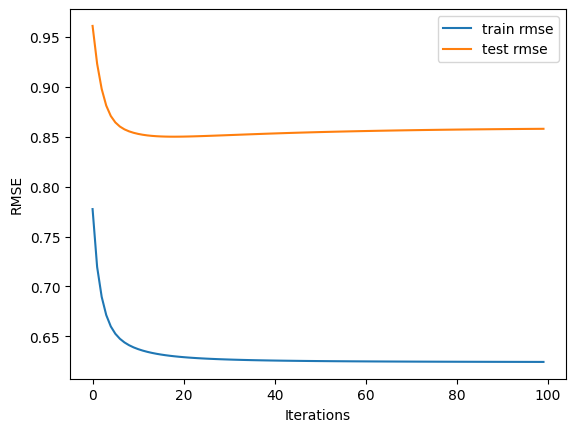

In [51]:
plt.plot(rmse_latent_train, label = 'train rmse')
plt.plot(rmse_latent_test, label = 'test rmse')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.savefig("GenFeats RMSEK20.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [53]:
with open('user_biases_trainembed20.pkl', 'wb') as f:
  pickle.dump(user_biases_train, f)

with open('item_biases_trainembed20.pkl', 'wb') as f:
  pickle.dump(item_biases_train, f)

with open('user_factor_trainembed20.pkl', 'wb') as f:
  pickle.dump(user_factor_train, f)

with open('item_factor_trainembed20.pkl', 'wb') as f:
  pickle.dump(item_factor_train, f)

with open('feature_embedding20.pkl', 'wb') as f:
  pickle.dump(feature_embedding, f)

with open('rmse_latent_trainembed20.pkl', 'wb') as f:
  pickle.dump(rmse_latent_train, f)

with open('rmse_latent_testembed20.pkl', 'wb') as f:
  pickle.dump(rmse_latent_test, f)

**Creating a dummy User and making Predictions**

In [ ]:
def new_user(movie_list, epochs):

    K = 10
    new_user_factor_train = np.zeros(K)
    lam = 5
    gamm = 0.1
    tau = 1

    for _ in range(epochs):
        bias = 0
        item_counter = 0
        for (n, r) in movie_list:
            bias += lam * (r - new_user_factor_train.T.dot(item_factor_train[n]) - item_biases_train[n])
            item_counter += 1
        bias = bias / (lam * item_counter + gamm)
        new_user_biases_train = bias

        #updating user factor
        user_factorm_train = 0
        user_factormm_train = 0
        for (n,r) in movie_list:
            user_factorm_train +=  item_factor_train[n]*item_factor_train[n].reshape(-1,1)
            user_factormm_train +=  item_factor_train[n] * (r - new_user_biases_train - item_biases_train[n])
        new_user_factor_train = np.linalg.solve(lam * user_factorm_train + tau * np.identity(K), lam * user_factormm_train)
        # print(new_user_factor_train, new_user_biases_train)

    return new_user_factor_train

In [ ]:
ids_movies = moviesdf['movieId']
movie_indexes = []
movie_titles = []

#movie_indexes and movie_titles lists
for movie_id in ids_movies:
    try:
        index = movie_to_idx[movie_id]
        movie_indexes.append(index)
        movie_titles.append(moviesdf[moviesdf['movieId'] == movie_id]['title'].values[0])
    except KeyError:
        continue

In [ ]:
index_to_title = dict(zip(movie_indexes, movie_titles))

In [ ]:
def get_prediction(movie_list, epochs, item_vector, item_bias, index_to_title, movie_data):
    # Calculate movie scores
    new_user_factor = new_user(movie_list, epochs)
    movie_score = np.einsum('i, ji -> j', new_user_factor, item_vector) + 0.5 * item_bias

    # Get movie indices sorted by score
    movie_indices = np.argsort(movie_score)[::-1]

    movie_indices = [index for index in movie_indices if len(movie_data[index]) >= 200]

    # Get recommended movies with titles
    recommendations = [(index, index_to_title[index]) for index in movie_indices[:20]]

    return recommendations

In [ ]:
get_prediction([(7028, 5)], epochs=500, item_vector=item_factor_train, item_bias=item_biases_train,
              index_to_title = index_to_title, movie_data = all_movie_data)

[(7028, 'Lord of the Rings: The Return of the King, The (2003)'),
 (4887, 'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
 (5840, 'Lord of the Rings: The Two Towers, The (2002)'),
 (20531, 'Hobbit: The Desolation of Smaug, The (2013)'),
 (18913, 'Hobbit: An Unexpected Journey, The (2012)'),
 (9950, 'Star Wars: Episode III - Revenge of the Sith (2005)'),
 (23320, 'The Hobbit: The Battle of the Five Armies (2014)'),
 (5270, 'Star Wars: Episode II - Attack of the Clones (2002)'),
 (16696, 'Harry Potter and the Deathly Hallows: Part 2 (2011)'),
 (24535, 'Star Wars: Episode VII - The Force Awakens (2015)'),
 (13507, 'Harry Potter and the Half-Blood Prince (2009)'),
 (15522, 'Harry Potter and the Deathly Hallows: Part 1 (2010)'),
 (257, 'Star Wars: Episode IV - A New Hope (1977)'),
 (1166, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (11697, 'Harry Potter and the Order of the Phoenix (2007)'),
 (10406, 'Harry Potter and the Goblet of Fire (2005)'),
 (1179, 'Star W

**Polarizing Movies**

In [ ]:
item_factor_lengths = np.linalg.norm(item_factor_train, axis=1)

In [ ]:
sorted_indices_by_length = np.argsort(item_factor_lengths)[::-1]

sorted_indices_by_length = [index for index in sorted_indices_by_length if len(all_movie_data[index]) >= 100]

In [ ]:
top_polarizing_indices = sorted_indices_by_length[:10]
top_polarizing = [(index, index_to_title[index]) for index in top_polarizing_indices]

In [ ]:
top_polarizing

[(14382, 'Room, The (2003)'),
 (16939, 'Birdemic: Shock and Terror (2010)'),
 (17344, 'Twilight Saga: Breaking Dawn - Part 1, The (2011)'),
 (18787, 'Twilight Saga: Breaking Dawn - Part 2, The (2012)'),
 (8617, 'Manos: The Hands of Fate (1966)'),
 (14856, 'Twilight Saga: Eclipse, The (2010)'),
 (13985, 'Twilight Saga: New Moon, The (2009)'),
 (12821, 'Twilight (2008)'),
 (228, 'Dumb & Dumber (Dumb and Dumber) (1994)'),
 (11108, 'Jackass Number Two (2006)'),
 (13922, 'Saw VI (2009)'),
 (17589, 'Human Centipede II (Full Sequence), The (2011)'),
 (11903, 'Saw IV (2007)'),
 (11171, 'Saw III (2006)'),
 (13496, 'Brüno (Bruno) (2009)'),
 (15450, 'Saw VII 3D - The Final Chapter (2010)'),
 (12784, 'Saw V (2008)'),
 (2271, 'Glen or Glenda (1953)'),
 (19196, 'Movie 43 (2013)'),
 (4151, 'Freddy Got Fingered (2001)')]

In [ ]:
least_polarizing_indices = sorted_indices_by_length[-10:]
least_polarizing = [(index, index_to_title[index]) for index in least_polarizing_indices]

In [ ]:
least_polarizing

[(9348, 'Man Who Copied, The (Homem Que Copiava, O) (2003)'),
 (7180, 'Black Widow (1987)'),
 (9552, "Rory O'Shea Was Here (Inside I'm Dancing) (2004)"),
 (5189, "Cat's Meow, The (2002)"),
 (20313, 'Inequality for All (2013)'),
 (6516, 'Wait Until Dark (1967)'),
 (349, 'Cobb (1994)'),
 (5211, 'Nine Queens (Nueve reinas) (2000)'),
 (12369, 'Bigger, Stronger, Faster* (2008)'),
 (4949, 'Dragon: The Bruce Lee Story (1993)'),
 (5288, "Let's Make Love (1960)"),
 (3916, 'Gift, The (2000)'),
 (46934, 'Roman J. Israel, Esq. (2017)'),
 (26041, 'The Stanford Prison Experiment (2015)'),
 (10590, "World's Fastest Indian, The (2005)"),
 (18285, "Angels' Share, The (2012)"),
 (6865, 'The Great Train Robbery (1978)'),
 (11058, 'Hollywoodland (2006)'),
 (6770, 'Italian Job, The (1969)'),
 (4875, 'Clockwise (1986)')]

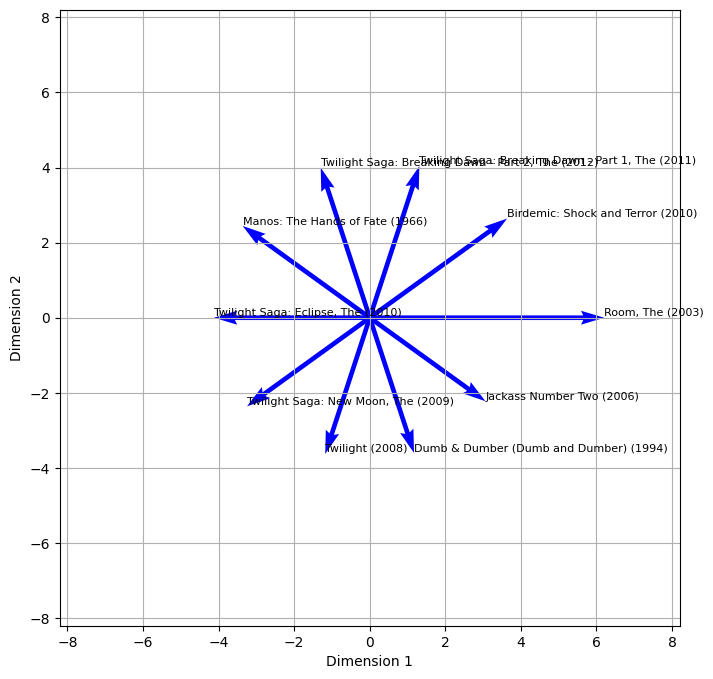

In [ ]:
angles = np.linspace(0, 2 * np.pi, len(top_polarizing), endpoint=False)

plt.figure(figsize=(8, 8))  # Reduced plot size
origin_x = np.zeros(len(top_polarizing))
origin_y = np.zeros(len(top_polarizing))

for i, (index, title) in enumerate(top_polarizing):
    length = item_factor_lengths[index]
    angle = angles[i]
    dx = length * np.cos(angle)
    dy = length * np.sin(angle)
    plt.quiver(0, 0, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue')
    plt.text(dx, dy, title, fontsize=8, verticalalignment='bottom', horizontalalignment='left')

plt.xlim(-max(item_factor_lengths[top_polarizing_indices]) - 2, max(item_factor_lengths[top_polarizing_indices]) + 2)
plt.ylim(-max(item_factor_lengths[top_polarizing_indices]) - 2, max(item_factor_lengths[top_polarizing_indices]) + 2)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.savefig('Polarizing.pdf', format="pdf", bbox_inches="tight")
plt.show()